<center><font size=6>Introdução à linguagem Julia aplicada à otimização</font></center>

<br>

<center><font size=5>Leonardo D. Secchin (UFES)</font></center>

<br>

<center><font size=4>Escola de Verão 2025 - PPGMAT/UFPI</font></center>

**Objetivos do minicurso:**

- Apresentar o funcionamente básico da linguagem Julia
- Discutir como Julia pode ser útil na modelagem e resolução de problemas de otimização
- Apresentar os principais pacotes mantidos pela comunidade cientifica voltados à otimização
- Não é um curso de otimização!
  - Um curso de otimização com Julia em português no Youtube: [vídeos de Abel Siqueira](https://www.youtube.com/playlist?list=PLOOY0eChA1uyk_01nGJVmcQGvcJq9h6_6)

**Pré-requisitos:**

- Modelos de otimização
- Métodos básicos (gradientes conjugados, método do gradiente, Newton)

**Acesso aos slides e códigos:**

[<center><font size=4>github.com/leonardosecchin/verao_UFPI_Julia</font></center>](https://github.com/leonardosecchin/verao_UFPI_Julia)

# Introdução

<font size=5>Existem várias linguagens de programação...</font>

<font size=5><b>Por que escolher Julia?</b></font>

## Algumas linguagens para computação científica

### C/C++/Fortran
* Pró: muito rápido se bem implementado (todo o código é compilado)
* Pró: possui ótimos compiladores livres
* Pró: versatilidade (liberdade total para o programador)
* Pró (Fortran): notação matricial
* Contra: +difícil, tempo longo para aprender a desenvolver bons códigos
* Contra: tarefas simples usualmente resultam em códigos longos
* Contra: não há gerenciamento de memória (risco de falhas de execução)
* Contra: integrar códigos de terceiros é difícil
* Contra: o lado ruim da versatilidade: toda tarefa fica para o programador $\Rightarrow$ aumento do risco de falhas e códigos mal implementados

### Python

* Pró: linguagem popular, muito código pronto disponível
* Pró: é livre
* Pró: aprendizagem fácil
* Pró: possui boas bibliotecas de alto desempenho (p.ex. para rotinas de álgebra linear)
* Pró: linguagem de propósito geral
* Contra: *loops*/laços lentos, dado que Python não compila código (linguagem interpretada)
* Contra: não há tantas bibliotecas para otimização

### Matlab

* Pró: fácil de programar e aprender
* Pró: possui boas bibliotecas para determinados nichos (p.ex. *Simulink* para sistemas dinâmicos)
* Contra: é pago, incluindo bibliotecas adicionais (e é bem caro!)
* Contra: código puro Matlab é lento, especialmente *loops*
* Contra: não há muitas bibliotecas para otimização (muito menos que Julia)

## Julia

Desenvolvida para computação científica de alto desempenho. Criada no MIT, primeira versão publicada em 2012.

### Por que usar Julia?

- É *software* livre. Assim, não requer licenças para uso
- É uma linguagem de alto nível, ou seja, é fácil programar e aprender (similar à Matlab)
- Por ser livre, a comunidade científica mantêm uma quantidade grande de códigos prontos (pacotes), que podem ser usados livremente. Isso traz enorme produtividade e economia de tempo
- Possui gerenciador de pacotes que torna a instalação e utilização de pacotes fácil
- Diferentemente do Matlab e Python, Julia compila o código. Isso traz eficiência comparada à linguagens de baixo nível como C/C++/Fortran
- Ao mesmo tempo que é fácil programar, tem foco no desempenho: os pacotes que rodam "por baixo" são implementados utilizando as melhores práticas/técnicas disponíveis (p.ex. rotinas de álgebra linear)
- **Tempo de aprendizado curto + produtividade + performance**
- Execução de códigos de outras linguagens (C/C++/Fortran) é fácil
- Bom para paralelismo

## Ambiente Julia

### Instalação no Windows

<center><font size=3>https://julialang.org</font></center>

<center><img src="imagens/site_julia.png" width=500></img></center>

É recomendável baixar a última versão estável (*stable release*) 64 bits.

### Instalação no GNU/Linux

**Opção 1:** loja de aplicativos do sistema operacional (p.ex. Ubuntu)

<center><img src="imagens/julia_loja_ubuntu.png" width=350></img></center>

**Opção 2:** script `juliaup`

Preferível, pois fornece melhor controle de versões. Passos:
1. Entre em https://github.com/JuliaLang/juliaup
1. Siga as instruções contidas no site

<center><img src="imagens/juliaup.png" width=400></img></center>

É recomendável instalar a última versão estável (*stable release*) 64 bits.

O ambiente Julia é executado em terminal de comandos (Powershell no Windows, terminal no GNU/Linux). Ao entrar, Julia está apto a receber comandos.

![](imagens/tela_julia.png)

No GNU/Linux, execute "julia" a partir do terminal de comandos.

### Modo gráfico com o Jupyter-lab

- Jupyter-lab é um ambiente de desenvolvimento simples, que funciona no navegador de internet.
- Pode ser executado a partir do sistema ou do Julia (veremos como).
- Trabalha com terminal e *notebooks*, extensão `.ipynb`, onde pode-se inserir textos, trechos de códigos, slides etc, tudo no mesmo documento.
- Os códigos Julia podem ser executados diretos no Jupyter-lab, onde as saídas do Julia são impressas.
- Oferece uma solução completa: é possível abrir terminais de comando, arquivos de códigos Julia, além de textos e slides.

<center><img src="imagens/jupyter-lab.png" width=650></img></center>

<center><img src="imagens/jupyter-lab2.png" width=650></img></center>

### Visual Studio Code

Ambiente completo de desenvolvimento da Microsoft, de uso livre. Possui diversas funcionalidades, porém é mais complexo.

- https://code.visualstudio.com/

## Primeiros exemplos

### Definindo funções

In [1]:
# o caracter # indica comentário, que não são executados!

# função simples escrita de maneira curta
f(x) = x^2

f (generic function with 1 method)

In [2]:
# especificando cabeçalho
function f(x)
    return x^2  # retorno da função
end

f (generic function with 1 method)

In [3]:
function h(A,b)
    m,n = size(A)
    println("A tem ordem $(m) x $(n)")
    if n != length(b)
        println("Dimensões de A e b incompatíveis!")
        return
    end
    Ab = A*b
    return Ab
end

h (generic function with 1 method)

In [4]:
f(3)

9

In [5]:
A = rand(5,3)
b = rand(3)
h(A,b)

A tem ordem 5 x 3


5-element Vector{Float64}:
 0.6817120953937776
 1.0540722084147993
 1.2830009926543964
 0.5640368592605913
 0.8245582690590242

### Variáveis

Existem vários tipos de variáveis: números "reais" (Real, Float64, Float32 ...), números inteiros (Int, Int64, Int32 ...), vetores, matrizes, textos, boleano (true/false)...

Ao definir uma variável sem especificar o tipo, o Julia identifica o melhor tipo automaticamente.

In [6]:
a = 1
b = 1.5;

In [7]:
typeof(a)

Int64

In [8]:
typeof(b)

Float64

In [9]:
v = [1; 3; 6]

3-element Vector{Int64}:
 1
 3
 6

In [10]:
u = [1; 3; 6.0]

3-element Vector{Float64}:
 1.0
 3.0
 6.0

Às vezes é interessante forçar um tipo para uma variável passada para uma função de modo a impedir o uso com argumentos inválidos.

In [11]:
function resto(a::Int, b::Int)   # a e b devem ser inteiros
    r = mod(a,b)
    return r
end

resto (generic function with 1 method)

In [12]:
resto(10,3)

1

In [13]:
resto(10.0,3)

LoadError: MethodError: no method matching resto(::Float64, ::Int64)
The function `resto` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  resto([91m::Int64[39m, ::Int64)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[11]:1[24m[39m


Uma das características importantes do Julia é o **múltiplo despacho**: podemos definir uma mesma função para diferentes tipos de cabeçalho. Isso é interessante por questões de eficiência e organização do código.

In [14]:
# função resto com parâmetros reais
function resto(a::Real, b::Real)
    println("Os dados de entrada são números reais.")
    r = mod(floor(a),floor(b))    # floor(x) é o maior inteiro menor ou igual a x
    return r
end

resto (generic function with 2 methods)

In [15]:
# ambos parâmetros são inteiros, Julia executa a primeira versão
resto(10,3)

1

In [16]:
# Um dos parâmetros é não inteiro, Julia executa a segunda versão.
# O segundo parâmetro 3 é convertido para Real.
resto(10.0,3)

Os dados de entrada são números reais.


1.0

In [17]:
# Ambos parâmetros são não inteiros
resto(10.5,3.56)

Os dados de entrada são números reais.


1.0

### Se ... então

Segue a mesma lógica de outras linguagens. Sintaxe:
```
if [condição]
    ...
else
    ...
end
```

In [18]:
x = 5
if x > 4
    println("x é grande...")
else
    println("x é pequeno")
end

x é grande...


**Observação**

`=` é usado para **atribuir** valores à variáveis. Para **comparar** o valor de duas variáveis, use `==`

In [19]:
if x == 5
    println("x é igual a 5")
end

x é igual a 5


### Laços

Seguem a lógica de várias outras linguagens.

In [20]:
# for: laço de tamanho pré-determinado
for i in 1:5
    print(i, " ")
end

1 2 3 4 5 

In [21]:
# while: laço de tamanho indeterminado
k = rand(3:6) # sorteia um número inteiro entre 3 e 6
while (k > 0)
    print(k, " ")
    k = k - 1
end

6 5 4 3 2 1 

Laços podem ser finalizados com `break`. Interessante para parar um `while` ao verificar uma condição de parada de um método.

In [22]:
function parada(x)
    pare = false
    if abs(x) < 1e-4    # o mesmo que abs(x) < 0.0001
        pare = true
    end
    return pare
end

maxiter = 5; k = 0; x = 1.0
while (true)
    println("Iteração $(k), x = $(x)")
    if (k >= maxiter)
        println("Número máximo de iterações atingido.")
        break
    end

    x /= 10   # o mesmo que x = x/10
    if parada(x)
        println("Critério de parada atingido, x = $(x)")
        break
    end
    k += 1   # o mesmo que k = k + 1
end

Iteração 0, x = 1.0
Iteração 1, x = 0.1
Iteração 2, x = 0.01
Iteração 3, x = 0.001
Iteração 4, x = 0.0001
Critério de parada atingido, x = 1.0e-5


### Vetores e matrizes

Em Julia, vetores são sempre vetores-colunas.

`;` separa **linhas**

espaço separa **colunas**

In [23]:
# Definindo um vetor
v = [1;2;3;4;5]

5-element Vector{Int64}:
 1
 2
 3
 4
 5

In [24]:
# Definindo uma matriz
A = [1.0  2.5  3.9;  4.0  5.9  6.7;  7.0  8.0  9.1]

3×3 Matrix{Float64}:
 1.0  2.5  3.9
 4.0  5.9  6.7
 7.0  8.0  9.1

**Alguns comandos básicos:**

In [25]:
n = 3; m = 2;
# sorteia um vetor de tamanho n com entradas entre 0 e 1
w = rand(n)

3-element Vector{Float64}:
 0.6736946671482783
 0.7413499843052186
 0.2707812391242117

In [26]:
# sorteia uma matriz m x n com entradas entre 0 e 1
M = rand(m,n)

2×3 Matrix{Float64}:
 0.234904  0.130814   0.155559
 0.639708  0.0585895  0.697064

**Operações**

In [27]:
A = rand(3,5);
B = rand(5,4);
C = rand(3,5);
a = rand(5);
b = rand(5);

In [28]:
# Adicão/multiplicação por escalar
S = 3*A - 1e-2*C

3×5 Matrix{Float64}:
 1.95548   2.0503    0.324989  2.52227  0.219038
 0.771635  0.911622  1.07047   1.22075  1.76165
 1.13093   1.02931   0.219236  0.80952  0.108564

In [29]:
C = A*b

3-element Vector{Float64}:
 1.4808159423859701
 1.2359133828733595
 0.7163647164676091

In [30]:
C = A*B

3×4 Matrix{Float64}:
 1.51975   1.31375  0.662748  1.08441
 1.1318    1.26086  0.999948  0.893772
 0.702714  0.69618  0.307825  0.477766

In [31]:
# Transposição
At = A'

5×3 adjoint(::Matrix{Float64}) with eltype Float64:
 0.654499   0.257536  0.378095
 0.684969   0.3042    0.345467
 0.110331   0.359463  0.0755974
 0.84134    0.408503  0.272446
 0.0747342  0.589728  0.0377554

**Matrizes especiais**

In [32]:
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [33]:
using LinearAlgebra
# Matriz simétrica
Symmetric(A)

3×3 Symmetric{Int64, Matrix{Int64}}:
 1  2  3
 2  5  6
 3  6  9

In [34]:
# Usando o triângulo inferior
Symmetric(A, :L)

3×3 Symmetric{Int64, Matrix{Int64}}:
 1  4  7
 4  5  8
 7  8  9

In [35]:
# Matriz identidade de ordem n
using LinearAlgebra
n = 3
I(n)

3×3 Diagonal{Bool, Vector{Bool}}:
 1  ⋅  ⋅
 ⋅  1  ⋅
 ⋅  ⋅  1

In [36]:
# Matriz diagonal
D = Diagonal([1;4;6])

3×3 Diagonal{Int64, Vector{Int64}}:
 1  ⋅  ⋅
 ⋅  4  ⋅
 ⋅  ⋅  6

In [37]:
# Triangular inferior
tril(A)

3×3 Matrix{Int64}:
 1  0  0
 4  5  0
 7  8  9

In [38]:
# Triangular superior
triu(A)

3×3 Matrix{Int64}:
 1  2  3
 0  5  6
 0  0  9

In [39]:
# Vetor/Matriz de 1's
w = ones(10);
W = ones(10,4);

In [40]:
# Vetor/Matriz de zeros
z = zeros(10);
Z = zeros(10,4);

**Atenção!**

Supõe que queiramos fazer uma cópia de um vetor `a` em um vetor `b'...

In [41]:
a = rand(2)

2-element Vector{Float64}:
 0.9130530032770565
 0.9846842857098641

In [42]:
b = a

2-element Vector{Float64}:
 0.9130530032770565
 0.9846842857098641

Aparentemente, `b` é uma cópia de `a`. Porém, o trecho de código acima não copia `a` na memória, apenas faz uma referência à `a`. Assim, se alterarmos `b`, alteraremos `a`:

In [43]:
b[1] = 0
a

2-element Vector{Float64}:
 0.0
 0.9846842857098641

Uma cópia na memória pode ser feita:

In [44]:
a = rand(2)
b = deepcopy(a)   # aloca uma nova cópia de "a" memória

2-element Vector{Float64}:
 0.47936588180189166
 0.01898756938384738

In [45]:
# alterando b
b[1] = 0
b

2-element Vector{Float64}:
 0.0
 0.01898756938384738

In [46]:
# a não é alterado
a

2-element Vector{Float64}:
 0.47936588180189166
 0.01898756938384738

O Julia evita fazer cópias na memória por uma questão de eficiência. Assim, o programador deve decidir conscientemente alocar nova memória. Evite fazer cópias quando desnecessário, sobretudo dentro de laços, pois isso deixará seu código mais lento.

**Alocando vetores**

In [47]:
n = 2
# alocando um vetor e preenchendo com zeros
v = zeros(n)

2-element Vector{Float64}:
 0.0
 0.0

In [48]:
# alocando um vetor com mesma estrutura de v,
# mas sem preencher (só reserva o espaço de memória)
u = similar(v)

2-element Vector{Float64}:
 6.80850569195825e-310
 3.37397331124e-312

O comando `similar` reserva um espaço de memória, mas não grava as coordenadas (os valores que aparecem acima significam nada).

No trecho acima, `u` tem o mesmo tamanho e tipo numérico que `v`. Isto é, `u` é um vetor de $\mathbb R^4$ com dados do tipo `Float64` (numero real).

Ao não gravar as coordenadas de `u`, economizamos tempo. Isso é útil quando apenas necessitamos reservar um espaço de memória para só depois gravar as coordenadas. Muito útil em implementações de métodos de otimização, como vamos utilizar mais a frente.

**ATENÇÃO:** Se executarmos `u = v`, isso substituirá o vetor alocado pela referência à `v`, como antes.

Para copiar `v` sobre `u`, precisamos gravar **coordenada a coordenada**.

In [49]:
# primeira forma: fazer um laço que corre todas as coordenadas
for i in 1:length(u)
    u[i] = v[i]
end

In [50]:
# segunda forma: notação .= (preferível)
u .= v

2-element Vector{Float64}:
 0.0
 0.0

### Indexação

A manipulação de matrizes e vetores no Julia é muito rica.

**Exemplos:**

In [51]:
v = [10;20;30;40;-50];

In [52]:
v[4]   # coordenada 4 de v

40

In [53]:
v[3:5]     # vetor coordenadas de 3 a 5

3-element Vector{Int64}:
  30
  40
 -50

In [54]:
coords = [1;3;5]   # coordenadas 1, 4 e 6
v[coords]

3-element Vector{Int64}:
  10
  30
 -50

In [55]:
v[v .> 30]    # coordenadas maiores que 30

1-element Vector{Int64}:
 40

In [56]:
v[(v .> 30) .| (v .< 0)]   # coordenadas maiores que 30 ou menores que 0

2-element Vector{Int64}:
  40
 -50

In [57]:
# coordenadas indicadas por vetores de V ou F
C = [true;false;false;true;true]
v[C]

3-element Vector{Int64}:
  10
  40
 -50

In [58]:
# índices correspondentes à negação de C
v[.!C]

2-element Vector{Int64}:
 20
 30

Podemos atribuir valor a qualquer vetor, coordenada, ou subvetor.

In [59]:
v = [10;20;30;40;-50;35];

In [60]:
v[1] = 312

312

In [61]:
v

6-element Vector{Int64}:
 312
  20
  30
  40
 -50
  35

In [62]:
# Atribuindo zero para as entradas de 3 a 5.
# Usamos .= para vetores ao invés de = para mudar 1 coordenada
v[3:5] .= 0;
v

6-element Vector{Int64}:
 312
  20
   0
   0
   0
  35

O mesmo vale para matrizes. É possível ler/mudar linhas e colunas.

In [63]:
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [64]:
A[1,2] = 0;
A

3×3 Matrix{Int64}:
 1  0  3
 4  5  6
 7  8  9

In [65]:
# mudando a coluna 1 de A
A[:,1] .= [-1;-2;-3];
A

3×3 Matrix{Int64}:
 -1  0  3
 -2  5  6
 -3  8  9

In [66]:
# alterando as entradas 2 e 3 d linha 3
A[3,2:3] .= [10;20];
A

3×3 Matrix{Int64}:
 -1   0   3
 -2   5   6
 -3  10  20

### Códigos salvos em arquivos

Todo código escrito em Julia pode ser salvo em arquivos para ser posteriormente carregado.

A extensão dos arquivos de código é `.jl`

Para carregar os códigos de um arquivo salvo, basta executar

`include("arquivo.jl")`

Se o arquivo está dentro de uma pasta, deve-se passar o caminho relativo contendo o nome da pasta.

Para facilitar, você pode salvar todos os arquivos `.jl` numa mesma pasta.

**Exemplo**

In [67]:
# Inclui o arquivo "codigo.jl"
include("codigo.jl");

Nele, estão definidas duas funções `teste` e `teste2` e um vetor `dados`. Ao incluirmos, esses objetos ficam disponíveis.

In [68]:
dados

4-element Vector{Float64}:
 3.0
 4.0
 7.2
 6.9

In [69]:
teste()

Esta função está escrita no arquivo codigo.jl


In [70]:
teste2(dados)

Vetor de entrada: [3.0, 4.0, 7.2, 6.9]

In [71]:
teste2([2;5;7;8;12])

Vetor de entrada: [2, 5, 7, 8, 12]

**Observações:**
1. Você pode usar qualquer editor tipo "bloco de notas" para escrever arquivos `.jl`. O Jupyter-lab possui um editor que edita/cria arquivos do tipo.
2. Você pode incluir arquivos em arquivos, isto é, o comando `include` pode ser usado dentro de um arquivo `.jl` para incluir outro arquivo. Se por exemplo `arquivo1.jl` inclue `arquivo2.jl`, ao carregar `arquivo1.jl`, `arquivo2.jl` também será incluído.
3. A separação de códigos em vários arquivos é uma questão de organização apenas. Você quem decidirá como organizar seu código!

## Gerenciamento de pacotes

Além das funções básicas que o Julia traz nativamente, podemos usar funções/algoritmos prontos para tarefas específicas.

Um pacote nada mais é que um conjunto de intruções pré-implementadas para um determinado fim.

Por ser *software* livre, qualquer pessoa pode implementar pacotes. A comunidade de otimização é bastante ativa, e logo há inúmeros pacotes disponíveis para uso dentro do Julia.

O gerenciador de pacotes pode ser acessado de dentro do Julia teclando ```]```

- **Adicionar um pacote:** ```]add PACOTE```  
  Isso fará o download automático e instalará o pacote. Uma vez feito, não é necessário instalar novamente o pacote, ele sempre estará disponível para uso
- **Remover um pacote:** ```]rm PACOTE```
- **Atualizar todos os pacotes instalados:** ```]up```

Para uma lista de pacotes disponíveis, consulte https://juliapackages.com

## Alguns pacotes frequentemente utilizados

- `LinearAlgebra`  
  Rotinas típicas de álgebra linear (operações eficientes com vetores/matrizes, fatorações, resolução de sistemas lineares)

- `SparseArrays`  
  Armazenamento eficiente de matrizes esparsas

- `Plots`  
  Plotagem de figuras/gráficos

- `DataFrames`  
  Ferramentas para manipulação de dados organizados em tabelas

- `JuMP`  
  **Escrita de modelos de otimização de "forma natural"**

- `NLPModels`, `NLPModelsJuMP`  
  **Cálculo automático de derivadas dos dados de um modelo de otimização**

## Usando pacotes

A instalação de um pacote é feita uma única vez:

`]add PACOTE`

A partir de então, o pacote estará disponível para uso sempre que requisitado.

O pacote deverá ser **carregado** antes do uso com o comando

`using PACOTE`

**Exemplo:**

In [72]:
n = 100;
x = rand(n);

In [73]:
norma = norm(x)
println("norma de x = ",norma)

norma de x = 5.659275583829759


In [74]:
# carrega pacote LinearAlgebra (previamente instalado)
using LinearAlgebra

# agora o comando norm está disponível!
norma = norm(x)
println("norma de x = ",norma)

norma de x = 5.659275583829759


## Executando códigos

Ao executar uma função/código, principalmente aqueles carregados de arquivos `.jl`, Julia irá compilá-lo na primeira execução. É como se o Julia executasse um compilador ao executar uma função pela primeira vez.

**Portanto, é normal que a primeira execução demore mais tempo.**

As execuções seguintes serão rápidas, justamente porque o código já estará compilado.

A inserção de pacotes pela primeira vez também costuma levar um tempo maior. Depois de inseridos, eles estarão carregados na memória para rápida execução.

Você perceberá isso na medida em que usa o Julia.

**Reforçando:** depois de compilados, os códigos em Julia rodam MUITO mais rápido que Matlab! Em processos iterativos, como os algoritmos de otimização, isso traz grande granho em eficiência.

## Mais exemplos

### Plotando um gráfico - pacote `Plots`

In [75]:
using Plots

In [76]:
x = -1:0.05:1;    # intervalo [-1,1] com passo 0.05
# função y = x^2
y(x) = x^2;

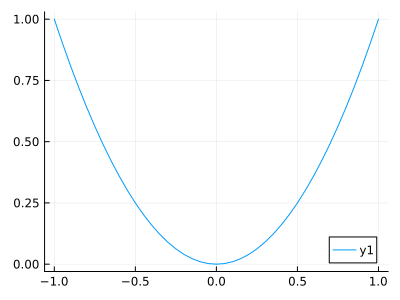

In [77]:
fig = plot(x, y, size=(400,300))    # constrói a figura

Plots aceitam personalização e sobreposição na mesma figura (observe os comandos com `!`)

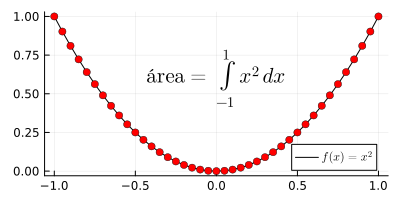

In [78]:
using LaTeXStrings

# legenda com código LaTex
fig = plot(x, y, label=L"f(x)=x^2", color=:black, size=(400,200))
# pontos laranja em cada x_i
fig = scatter!(x, y, label="", color=:red);
# anotação na posição (0,0.6)
fig = annotate!(0, 0.6, L"\textrm{área}=\int_{-1}^1 x^2 \, dx");
# salva a figura
savefig(fig, "exemplo.png");
# exibe na tela
display(fig);

#### Algumas opções de personalização

**Textos:**
- Texto do título: `title="Texto do título"`
- Texto dos eixos: `xlabel="x"`, `ylabel="y"`
- Texto da legenda: `label="f"`

**Eixos:**
- Marcas nos eixos: `xtick=(0:0.5:10, ["\$ $(i) \$" for i in 0:0.5:10])`, `ytick=-1:0.5:1`
- Limites nos eixos: `xlims=(0,10)`, `ylims=(-1,1)`
- Escala dos eixos: `xscale/yscale=:identity :log10`
- Forçar mesma proporção entre eixos: `aspect_ratio=:equal`

**Fontes:**
- Tamanho da fonte do título: `titlefont=font(40)`
- Tamanho da fonte dos eixos: `xguidefont=font(30), yguidefont=font(20)` ou `guidefont=font(20)`
- Tamanho da fonte das marcas: `xtickfont=font(15), ytickfont=font(20)` ou `tickfont=font(10)`
- Tamanho da fonte da legenda: `legendfont=font(12)`
- Mudar tudo para fonte padrão do Latex: `fontfamily="Computer Modern"`

**Linhas dos gráficos:**

- Espessura da linha do gráfico em pixels: `lw=3`
- Estilo da linha do gráfico: `ls=:solid` (padrão) `:dot` `:dash` `:auto` `:dashdot` `:dashdotdot`
- Cor da linha do gráfico: `color=:black` `:red` `:blue` `:yellow` `:cyan` `:orange`... ou `color=RGB(.1, .3, 1)`
- Marcas no gráfico: `markershape=:none` (padrão) `:auto` `:circle` `:rect` `:star5` `:diamond` `:hexagon` `:cross` `:xcross` `:utriangle` `:dtriangle` `:rtriangle` `:ltriangle` `:pentagon` `:heptagon` `:octagon` `:star4` `:star6` `:star7` `:star8` `:vline` `:hline` `:+`
- Tamanho das marcas do gráfico em pixels: `markersize=4`

**Outras configurações da legenda:**

- Posição da legenda: `legend=:right` `:left` `:top` `:bottom` `:inside` `:best` `:topright` `:topleft` `:bottomleft` `:bottomright`
- Ocultar legenda: `leg=false`
- Cor do fundo da legenda: `background_color_legend=:[COR]` ou `background_color_legend=:transparent` (fundo transparente)

**Imagem:**

- Tamanho da imagem em pixels: `size=(500,400)`
- Preencher área abaixo do gráfico: `fill=(0,:orange,0.5)` (altura referência $y = 0$, cor laranja, 50% de opacidade)

### Resolvendo sistemas lineares médios/pequenos

A resolução de sistemas lineares no Julia pode ser feita pelo comando `\`.

In [79]:
A = [3 2 1;
     4 6 5;
     7 8 9]
b = [0; 1; 2]

# Resolvendo o sistema Ax = b
x = A\b

3-element Vector{Float64}:
 -0.06666666666666665
 -0.06666666666666674
  0.33333333333333337

In [80]:
norm(A*x - b)

5.551115123125783e-17

`\` implementa várias técnicas: dependendo da matriz $A$, Julia decide qual a melhor forma de resolver $Ax=b$. Por exemplo,
- Se $A$ é triangular, então o sistema é resolvido por substituição ($A$ não é fatorada)
- Se $A$ for quadrada e não triangular, $Ax=b$ é resolvido usando fatoração LU
- Se $A$ for retangular, `x = A\b` será a solução de quadrados mínimos computada usando fatoração QR
- Se $A$ for esparsa, LDL$^t$ é usada

Portanto, é útil **fornecer a estrutura da matriz caso você já saiba!** Isso resultará em ganho de eficiência.

In [81]:
# Matriz triangular superior
A = [3 2 1;
     0 6 5;
     0 0 9]

3×3 Matrix{Int64}:
 3  2  1
 0  6  5
 0  0  9

In [82]:
b = [1;2;3]
x = A\b    # apesar de A ser triangular, é tratada como uma matriz qualquer

3-element Vector{Float64}:
 0.1851851851851852
 0.05555555555555558
 0.3333333333333333

In [83]:
x = triu(A)\b   # aqui dizemos ao Julia que A é triangular

3-element Vector{Float64}:
 0.1851851851851852
 0.05555555555555558
 0.3333333333333333

## Instalação e execução do Jupyter-lab

Uma maneira de instalar o Jupyter-lab é a partir do próprio Julia:

- Abra o Julia
- Instale o pacote `IJulia` (`]add IJulia`)  
  Isso instalará o Jupyter-lab e o núcleo do Julia para o Jupyter-lab, que permite a execução de comandos Julia direto no ambiente gráfico. A instalação é feita uma única vez.

Com o `IJulia` instalado, você poderá abrir o Jupyter-lab **a partir do menu de programas do sistema operacional**. Caso não seja possível, uma opção é abri-lo a partir do Julia:
- Abra o Julia
- Carregue o pacote `IJulia` (`using IJulia`)
- Execute `jupyterlab()`

## Como obter ajuda para pacotes e comandos?

As principais fontes de ajuda são:
- Para ajuda com comandos de um pacote específico, consulte a página do pacote. Ela geralmente traz instruções de uso e a documentação completa
- Um atalho que geralmente resolve é o ambiente de ajuda do Julia: teclando ```?COMANDO```, uma ajuda com exemplos é exibida
- Fóruns na internet
- Documentação oficial do Julia (https://docs.julialang.org/en/v1)

Usualmente, tudo começa com uma busca do tipo "como fazer tal coisa no julia?"

**Exemplo:**

1. Como computar a decomposição SVD de uma matriz?...
1. Um dos pacotes que faz isso é o ```LinearAlgebra```, que traz o comando ```svd``` (pode não ser o único pacote)
1. Experimente executar no Julia:
   - Instale ```LinearAlgebra``` caso não o tenha
   - ```using LinearAlgebra```
   - ```?svd```

## Mensagem importante

Como em qualquer linguagem, você aprenderá com a prática quais pacotes/comandos são adequados para as tarefas que costuma realizar!

Com o tempo, você também começará a buscar melhores práticas de programação (visando eficiência, por exemplo) e pacotes mais adequados.

**Isso só você pode fazer!!!**

## Exercícios

**Exercício 1:** Reproduza todos os comandos vistos até aqui. Familharize-se com a manipulação de vetores e matrizes, condicionais se...então e laços. Recorra à ajuda contida no Julia ou em outra fonte caso necessário.

**Exercício 2:** Instale os seguintes pacotes no seu Julia:

`LinearAlgebra`, `SparseArrays`, `Plots`, `DataFrames`, `JuMP`, `NLPModels`, `NLPModelsJuMP`, `MatrixDepot`, `Printf`, `DelimitedFiles`, `GLPK`, `NLPModelsIpopt`, `NLPModelsAlgencan`, `CUTEst`

**Exercício 3:** Calcule a decomposição a valores singulares (SVD) de matrizes construídas randomicamente. Use o comando `svd` do pacote `LinearAlgebra`. Estude os exemplos contidos na ajuda do comando. Compare o produto $U\Sigma V^t$ das matrizes obtidas na decomposição com a matriz original.

**Exercício 4:** Procure um comando que compute a decomposição QR de uma matriz. Aplique em matrizes geradas randomicamente.

**Exercício 5:** Crie um arquivo `.jl` de código com 2 funções que recebam uma matriz e retornem as fatorações SVD e QR. Carregue-o no Julia e aplique as funções à diferentes matrizes.

# Escrevendo modelos de otimização - pacote `JuMP`

Vamos considerar o modelo geral de otimização

\begin{align*}
\min_x \, & f(x)\\
\text{s.a. }& h_i(x)=0, \quad i=1,\ldots,m\\
&g_j(x)\leq 0, \quad j=1,\ldots,p\\
&l_i\leq x_i\leq u_i, \quad i=1,\ldots,n
\end{align*}

Vamos supor que todas as funções sejam pelo menos de classe $\mathcal C^1$.

O pacote `JuMP` permite escrever modelos de otimização linear, não linear, restritos, irrestritos, com variáveis contínuas e/ou discretas de forma natural.

## Exemplo 1

\begin{equation*}
\min_x x_1^2 + x_2^2
\end{equation*}

In [84]:
# Carrega o pacote. ATENÇÃO: Julia faz distinção entre
# maiúsculas e minúsculas, portanto jump, Jump etc não funcionará
using JuMP

In [85]:
# cria o modelo em branco
P1 = Model();

In [86]:
# variáveis x1 e x2
@variable(P1, x[1:2])

2-element Vector{VariableRef}:
 x[1]
 x[2]

In [87]:
# função objetivo não linear, sentido de "minimização"
@objective(P1, Min, x[1]^2 + x[2]^2)

x[1]² + x[2]²

In [88]:
# imprime o modelo para verificação
print(P1)

## Exemplo 2

\begin{align*}
\min_x & \, \sum_{i=1}^m (x_i-5)^2 + \sum_{i=1}^{m-1} (x_{i+1} - x_i)^3\\
\text{s.a.} \ & 1\leq x_i\leq 4, \quad i=1,\ldots,m
\end{align*}

In [89]:
using JuMP

m = 3
P2 = Model()

# variáveis e seus limitantes
@variable(P2, 1 <= x[1:m] <= 4)

# função objetivo
@objective(P2, Min, sum((x[i]-5)^2 for i in 1:m) + sum((x[i+1]-x[i])^3 for i in 1:m-1) )

(x[1]² + x[2]² + x[3]² - 10 x[1] - 10 x[2] - 10 x[3] + 75) + ((x[2] - x[1]) ^ 3) + ((x[3] - x[2]) ^ 3)

Observe que a escrita das somas são feitas "como se escreve no papel" com `sum`

Internamente, as somas são expandidas.

In [90]:
print(P2)

## Exemplo 3

\begin{align*}
\min_x \, & (x_1-2)^2 + (x_2-1)^2\\
\text{s.a. } & x_1 + x_2 - 2\leq 0\\
&x_1^2-x_2\leq 0
\end{align*}

In [91]:
using JuMP

P3 = Model()
@variable(P3, x[1:2])

# FO não linear
@objective(P3, Min, (x[1]-2)^2 + (x[2]-1)^2)

# Restrição linear
@constraint(P3, x[1] + x[2] - 2 <= 0)

# Restrição não linear
@constraint(P3, x[1]^2 - x[2] <= 0);

## Exemplo 4

Um investidor quer aplicar seu capital em produtos financeiros (ações, renda fixa etc) selecionados de um *portifólio* de opções.

O investidor espera ter um retorno mínimo predefinido, e sua intenção é minimizar o risco considerando o histórico de retornos de cada opção de investimento.

**Dados do problema:**
- $n$: número de produtos no portifólio;
- $\sigma\in \mathbb R^n$: vetor dos retornos esperados de cada produto;
- $Q\in \mathbb R^{n\times n}$: matriz de covariância. A entrada $q_{ij}$ mede a interdependência entre as opções $i$ e $j$. $Q$ será simétrica e semidefinida positiva;
- $R>0$: retorno esperado pelo investidor;
- $u\in [0,1]^n$: vetor com o máximo percentual a ser investido em cada produto;
- $N\in \mathbb Z_+$: número máximo de produtos selecionados. Evidentemente, $N < n$.

**Variáveis:**
- $x_i\geq 0$: fração do montante total investido no produto $i$, $i=1,\ldots,n$;
- $y_i\in [0,1]$: indica se o produto $i$ foi selecionado ($y_i = 0$) ou não ($y_i\neq 0$), para $i=1,\ldots,n$.

**Modelo:**

\begin{align}
	\min_{x, y} \ & x^t Q x\\
	\text{sujeito a} \ & \sum_{i=1}^n \sigma_ix_i\geq R\\
	&\sum_{i=1}^n x_i = 1\\
	&x_iy_i=0, & i=1,\ldots,n\\
	&\sum_{i=1}^n y_i \geq n - N\\
	&0\leq x_i\leq u_i, \quad 0\leq y_i\leq 1, & i=1,\ldots,n
\end{align}

- Função objetivo: diversifica os produtos (diminuição do risco);
- 1a restrição: o retorno total esperado é pelo menos $R$;
- 2a restrição : diz que as frações do investimento somam o montante total a ser investido;
- 3o bloco de restrições: diz que se não investimos no produto $i$ ($x_i=0$), então é permitdo $y_i>0$;
- 4a restrição: busca contar os produtos não selecionados/investidos, dizendo que eles devem ser, no mínimo, $n-N$ (assim, não selecionamos mais que $N$ produtos);
- 5o bloco de restrições: limitantes das variáveis.

In [92]:
# Dados de entrada: n, sigma, Q, R, u, N
function modelo(n,sigma,Q,R,u,N)
    P = Model()

    # Variáveis
    @variable(P, x[1:n] >= 0)    # frações do montante investido
    @variable(P, y[1:n], Bin)    # investe no ativo i?  (variável binária: 0=não, 1=sim)

    @objective(P, Min, x'*Q*x)                             # Função objetivo quadrática
    @constraint(P, sum(sigma[i]*x[i] for i in 1:n) >= R)   # 1a restrição
    @constraint(P, sum(x[i] for i in 1:n) == 1)            # 2a restrição
    for i in 1:n                                           # 3o bloco de restrições
        @constraint(P, x[i]*y[i] == 0)
    end
    @constraint(P, sum(y[i] for i in 1:n) >= n - N)        # 4a restrição
    for i in 1:n                                           # 5a restrição
        set_upper_bound(x[i], u[i])
    end

    return P
end

modelo (generic function with 1 method)

In [93]:
# Exemplo
n = 3
sigma = ones(n)
Q = Symmetric(rand(n,n)) + 2.0*I(n)
R = 10
u = rand(n)
N = 2

P4 = modelo(n, sigma, Q, R, u, N);

In [94]:
print(P4)

## Acessando dados do problema e suas derivadas - pacotes `NLPModels` e `NLPModelsJuMP`

Uma coisa muito conveniente é que não precisamos calcular derivadas de primeira e segunda ordens da função objetivo e restrições à mão, o Julia faz isso por nós. Para tanto, convertemos o modelo Julia para a estrutura `NLPModels` através do pacote `NLPModelsJuMP`.

Isso é extremamente conveniente pois métodos costumam exigir cálculo de derivadas!

**Exemplo:**

\begin{align*}
\min_x \, & f(x) = (x_1-2)^2 + (x_2-1)^2\\
\text{s.a. } & g_1(x) = x_1 + x_2 \leq 2\\
&g_2(x) = x_1^2-x_2\leq 0
\end{align*}

In [95]:
using JuMP, NLPModels, NLPModelsJuMP

P3 = Model()
@variable(P3, x[1:2])
@objective(P3, Min, (x[1]-2)^2 + (x[2]-1)^2)
@constraint(P3, x[1] + x[2] <= 2)
@constraint(P3, x[1]^2 - x[2] <= 0);

\begin{align*}
\min_x \, & f(x) = (x_1-2)^2 + (x_2-1)^2\\
\text{s.a. } & g_1(x) = x_1 + x_2 \leq 2\\
&g_2(x) = x_1^2-x_2\leq 0
\end{align*}

In [96]:
nlp = MathOptNLPModel(P3);   # CONVERTEMOS O MODELO JuMP PARA NLPModels

In [97]:
x = [1.0; 1.0];

In [98]:
obj(nlp, x)    # função objetivo em x

1.0

In [99]:
grad(nlp, x)    # gradiente da função objetivo em x

2-element Vector{Float64}:
 -2.0
  0.0

In [100]:
hess(nlp, x)    # hessiana da função objetivo em x

2×2 Symmetric{Float64, SparseArrays.SparseMatrixCSC{Float64, Int64}}:
 2.0   ⋅ 
  ⋅   2.0

\begin{align*}
\min_x \, & f(x) = (x_1-2)^2 + (x_2-1)^2\\
\text{s.a. } & g_1(x) = x_1 + x_2 \leq 2\\
&g_2(x) = x_1^2-x_2\leq 0
\end{align*}

In [101]:
cons(nlp, x)    # restrições em x (sem o termo livre)

2-element Vector{Float64}:
 2.0
 0.0

**ATENÇÃO:** `cons` não leva em conta os limitantes das restrições!

O vetor de limitantes superiores é gravado em `nlp.meta.ucon`, enquanto o vetor de limitantes inferiores para as restrições em `nlp.meta.lcon`.

No exemplo anterior, podemos fazer

In [102]:
cons(nlp, x) .- nlp.meta.ucon   # avalia g(x) - u

2-element Vector{Float64}:
 0.0
 0.0

Por que o Julia não considera os limitantes ao avaliar as restrições com `cons`?  **Resposta:** para evitar ambiguidade.

**Exemplo:** suponha que uma restrição tenha limitante superior E inferior:

$L \leq c(x)\leq U$.

Então "avaliar essa restrição" é ambiguo porque, na verdade, são duas restrições ($L - c(x)\leq 0$ e $c(x) - U\leq 0$)

- `cons(nlp, x)` avalia $c(x)$ sem limitantes.
- `nlp.meta.lcon .- cons(nlp, x)` avalia $L - c(x)$
- `cons(nlp, x) .- nlp.meta.ucon` avalia $c(x) - U$

**Jacobiano:** $\quad$
$
J(x) = \left[
\begin{array}{c}
\nabla g_1^t(x)\\ \vdots \\ \nabla g_p^t(x)
\end{array}
\right]
$

In [103]:
jac(nlp, x)    # Jacobiano em x

2×2 SparseArrays.SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 1.0   1.0
 2.0  -1.0

\begin{align*}
\min_x \, & f(x)\\
\text{s.a. }& h_i(x)=0, \ i=1,\ldots,m\\
&g_j(x)\leq 0, \ j=1,\ldots,p
\end{align*}

**Lagrangiana:**
$$
L(x,\lambda) = f(x) + \sum_{i=1}^m \lambda_i^h h_i(x) + \sum_{j=1}^p \lambda_j^g g_j(x)
$$

**Hessiana da lagrangiana:**
$$
\nabla^2_{xx} L(x,\lambda) = \nabla^2 f(x) + \sum_{i=1}^m \lambda_i^h \nabla^2 h_i(x) + \sum_{j=1}^p \lambda_j^g \nabla^2 g_j(x)
$$

In [104]:
# Hessiana da lagrangeana do exemplo em x = [1.0;1.0] com multiplicador λ^g = [0.5;1.5]
hess(nlp, x, [0.5;1.5])

2×2 Symmetric{Float64, SparseArrays.SparseMatrixCSC{Float64, Int64}}:
 5.0   ⋅ 
  ⋅   2.0

As vezes precisamos apenas produto "hessiana x vetor" ou "jacobiana x vetor".
É a opção preferível por questões de eficiência (calcular produto matriz-vetor não requer armazenar a matriz na memória).

In [105]:
# ∇^2 L(x,λ) * v
λ = [0.5;1.5]
v = [1.0;-1.0]
hprod(nlp, x, λ, v)

2-element Vector{Float64}:
  5.0
 -2.0

In [106]:
jprod(nlp, x, v)    # J(x) * v

2-element Vector{Float64}:
 0.0
 3.0

In [107]:
u = [5.0;4.0]
jtprod(nlp, x, u)    # J(x)^t * u

2-element Vector{Float64}:
 13.0
  1.0

Mais detalhes: https://github.com/JuliaSmoothOptimizers/NLPModels.jl

## Exercícios

**Exercício 6:** Considere a função de Rosenbrock $f(x) = 100(x_2 − x^2_1)^2 + (1 − x_1)^2$. Escreva o modelo `JuMP` e converta para a estrutura `NLPModels`. Estude a otimalidede do ponto $x=(1,1)$ calculando no Julia gradiente e hessiana.

*Dica: você pode calcular todos os autovalores de uma matriz $A$ executando* `using LinearAlgebra; eigvals(Matrix(A))`

**Exercício 7:** Repita o exercício anterior com a função de Rosenbrock de $n$ variáveis dada por
$$
f(x) = \sum_{i=1}^{n-1} 100(x_{i+1} − x^2_i)^2 + (1 − x_i)^2
$$
Escolha $n\geq 3$ (por exemplo, $n=10$). **Não expanda a soma à mão!**

**Exercício 8:** Considere a função $f(x) = x_1^2 - x_1x_2 + 2x_2^2 − 2x_1 + e^{x_1 + x_2}$. Encontre uma direção $d\in \mathbb R^2$ tal que $\nabla f(0,0)^td<0$ (use o Julia para fazer a conta).

**Exercício 9:** Considere os pontos
$$(x_1,y_1)=(1,1), \quad (x_2,y_2)=(2,2), \quad (x_3,y_3)=(3,1) \quad \textrm{e} \quad (x_4,y_4)=(4,3)$$ do plano $xy$. A reta $y=ax+b$ que melhor aproxima esses pontos é a reta cujos coeficientes minimizam a função de erro
$$f(a,b)=\sum_{i=1}^4 e_i^2,$$
onde $e_i$ é a diferença entre as alturas do ponto $(x_i,y_i)$ e o ponto $(x_i,ax_i+b)$ da reta, isto é,
$$e_i = y_i - (ax_i+b).$$
<center>
<img src="imagens/ajuste-1.png" width=300></img>
</center>

Monte o modelo `JuMP` que represente o problema.

**Exercício 10:** Escreva o modelo `JuMP` de cada um dos problemas abaixo.
- $\begin{align*}
		\min\,\, &x^2+y^2-6x-2y+10\\
		\text{s.a } & 2x+y-2\leq 0\\
		&y-1\leq 0
		\end{align*}$

- $\begin{align*}
		\min\,\, &-2x+y\\
		\text{s.a } & x^2-y\leq 0\\
		&y-4\leq 0
		\end{align*}$

- $\begin{align*}
	\min\,\, &x_1+x_2+\cdots+x_n\\
	\text{s.a } & x_1x_2\cdots x_n = 1\\
	&x_i\geq 0, \ i=1,\ldots,n.
\end{align*}$

**Exercício 11:** Escreva o modelo do GAP (*generalized assignment problem*) em `JuMP`:

$$
\begin{align*}
\max_x & \sum_{i=1}^m \sum_{j=1}^n p_{ij}x_{ij}\\
\text{s.a } & \sum_{j=1}^n w_{ij}x_{ij}\leq t_i \qquad i=1,\ldots,m\\
& \sum_{i=1}^m x_{ij} \leq 1 \qquad j=1,\ldots,n\\
& x_{ij}\in \{0,1\} \qquad i=1,\ldots,m, \quad j=1,\ldots,n
\end{align*}
$$
em que os $p_{ij}$'s, $w_{ij}$'s e $t_i$'s são parâmetros positivos dados pelo usuário. Observe que $p$, $w$ e as variáveis $x$ são **matrizes** $m\times n$, e que o sentido de otimização é **maximizar**.

Consulte https://en.wikipedia.org/wiki/Generalized_assignment_problem para uma descrição detalhada do problema.

**Exercício 12:** Transforme o segundo modelo do Exercício 10 na estrutura `NLPModels` executando algo como `nlp = MathOptNLPModel(P)`. Estude as propriedades do problema explorando a estrutura `nlp.meta`. Identifique número de variáveis, número de restrições totais, lineares, não lineares, limitantes superiores e inferiores de variáveis e restrições.

Veja a seção "Attributes" em https://github.com/JuliaSmoothOptimizers/NLPModels.jl para uma lista completa.

# Métodos de otimização: exemplos

## Método de Newton

O método de Newton é um método clássico para resolução de sistemas não lineares. Pode ser usado para minimizar funções gerais pois "resolver" o problema
$$\min_x f(x),$$
$f$ de classe $\mathcal C^2$, consiste em resolver o sistema não linear
$$\nabla f(x)=0.$$

Considere um sistema não linear com 1 variável e 1 equação $F(x)=0$.

**Ideia Newtoniana:**

1. Encontrar um zero de $F$ é difícil... Então trocamos o problema de resolver $F(x)=0$ por uma sequência de problemas mais fáceis.
2. Dado $x^k$, o próximo iterando $x^{k+1}$ será zero da aproximação linear de $F$ em $x^k$.
3. "Se tudo ocorrer bem", $x^k$ tenderá à um zero de $F$.

<center><img src="imagens/newton_iter.png" width=300></img></center>

<center><font size=1>Fonte da imagem: https://procesosnumericos2015.weebly.com/meacutetodo-de-newton-raphson.html</font></center>

Aproximação linear de $F$ em $x^k$:
$$
L(x) = F(x^k) + F'(x^k)(x-x^k).
$$
Portanto, $x^{k+1}$ é tal que $L(x^{k+1})=0$, isto é,
$$
F'(x^k)(x^{k+1}-x^k) = -F(x^k).
$$
Chamando $d^k = x^{k+1}-x^k$ (direção Newtoniana), $d^k$ é solução do **sistema Newtoniano**
$$
F'(x^k)d = -F(x^k),
$$
e o **passo de Newton** é
$$
x^{k+1} = x^k + d^k.
$$

Isso pode ser feito para sistemas com $n$ variáveis e $m$ equações ($F: \mathbb R^n\to \mathbb R^m$)...

No caso de interesse, $F=\nabla f: \mathbb R^n \to \mathbb R^n$, e a iteração Newtoniana fica
$$
\nabla^2 f(x^k) d^k = -\nabla f(x^k), \qquad x^{k+1} = x^k + d^k.
$$

Critério de parada com a norma do infinito: $\quad\|\nabla f(x)\|_\infty\leq \varepsilon$

---

**Método de Newton**

*Entrada:* ponto inicial $x^0\in \mathbb R^n$ e tolerância para convergência $\varepsilon > 0$

1. enquanto $\|\nabla f(x^k)\|_\infty > \varepsilon$
2. $\quad$ Calcule a direção de Newton $d^k$ resolvendo o sistema Newtoniano $\nabla^2 f(x^k)d = -\nabla f(x^k)$
3. $\quad$ $x^{k+1} = x^k + d^k$
4. $\quad$ $k \leftarrow k+1$
5. fim

---

Para cálculo de derivadas, usaremos `JuMP` com `NLPModels`.

In [108]:
using LinearAlgebra, Printf

# Método de Newton
# Entrada: modelo nlp na estrutura NLPModels, x0 ponto inicial (opcional)

function newton(nlp; x0 = nothing, eps = 1e-6, maxiters = 100, saidas = true)
    # lê o número de variáveis da estrutura NLPModels
    n = nlp.meta.nvar

    # Testa se usuário forneceu o ponto inicial. Se não forneceu, inicia na origem
    if isnothing(x0)
        x = zeros(n)
    else
        # aloca vetor solução, copiando x0
        x = deepcopy(x0)
    end

    # contador de iterações
    k = 0

    # computa gradiente e sua norma do infinito
    g = grad(nlp, x)
    norma_g = norm(g, Inf)

    # cabeçalho
    if saidas
        println("Iter  |     norma ∇f |     norma dN")
    end

    while (k <= maxiters)
        # Solução do sistema Newtoniano
        d = hess(nlp, x) \ (-g)

        x .= x + d

        k += 1

        # Atualiza gradiente e norma no novo iterando
        g = grad(nlp, x)
        norma_g = norm(g, Inf)

        # Imprime dados da iteração
        if saidas
            @printf("%5d | %.6e | %.6e\n", k, norma_g, norm(d,Inf))
        end

        # Parar?
        if (norma_g <= eps)
            if saidas
                println()
                println("Problema resolvido com sucesso!")
            end
            # encerra laço while
            break
        end
    end

    # Retorna solução, |∇f|_∞ e número de iterações
    return x, norma_g, k
end

newton (generic function with 1 method)

**Exemplo**

In [109]:
using JuMP, NLPModels, NLPModelsJuMP

P = Model()
@variable(P, x[1:2])
@objective(P, Min, sin(x[1] - pi/4) + (1-x[2])^3);

In [110]:
print(P)

In [111]:
nlp = MathOptNLPModel(P)

newton(nlp);
#newton(nlp, x0=[10.0;-0.5]);

Iter  |     norma ∇f |     norma dN
    1 | 7.500000e-01 | 1.000000e+00
    2 | 1.875000e-01 | 2.500000e-01
    3 | 4.687500e-02 | 1.250000e-01
    4 | 1.171875e-02 | 6.250000e-02
    5 | 2.929688e-03 | 3.125000e-02
    6 | 7.324219e-04 | 1.562500e-02
    7 | 1.831055e-04 | 7.812500e-03
    8 | 4.577637e-05 | 3.906250e-03
    9 | 1.144409e-05 | 1.953125e-03
   10 | 2.861023e-06 | 9.765625e-04
   11 | 7.152557e-07 | 4.882813e-04

Problema resolvido com sucesso!


## Método do gradiente

Basicamente, métodos tipo gradiente para minimização irrestrita consistem na iteração
$$
x^{k+1} = x^k - t_k\nabla f(x^k)
$$
onde $t_k\in (0,1]$ é o **tamanho de passo**.

Sabemos que $d^k = -\nabla f(x^k)$ decresce $f$ **localmente** a partir de $x^k$ caso $\nabla f(x^k)^td^k<0$ (direção de descida).

Qual tamanho do passo $t_k$ garante que $f(x^{k+1}) = f(x^{k}+t_kd^k) \ll f(x^k)$?

**Condição de Armijo:** Compute $t_k\in (0,1]$ de modo a satisfazer
$$
f(x^{k}+t_kd^k) \leq f(x^k) + \eta t_k \nabla f(x^k)^td^k
$$
onde $\eta\in (0,1)$ é um parâmetro.

**Teorema:**

Se $\nabla f(x^k)^td^k<0$ então existe $\bar t\in (0,1]$ tal que a condição de Armijo é satisfeita para todo $t\in (0,\bar t]$.

**Busca linear inexata com *backtracking***

1. Inicie $t_k \leftarrow 1$
2. Se a condição de Armijo for satisfeita, pare: **$t_k$ é um passo válido**. Caso constrário, atualize $t_k \leftarrow t_k/2$ e repita este passo.

O Teorema anterior garante que o procedimento acima é finito.

Isto é, tentamos primeiro o passo 1 e o dividimos por 2 até que o decréscimo de $f$ segundo Armijo ocorra.

**Método do gradiente com backtracking**

*Entrada:* $\quad x^0\in \mathbb R^n$, parâmetro de Armijo $\eta \in (0,1)$, tolerância para convergência $\varepsilon>0$

1. enquanto $\|\nabla f(x^k)\|_\infty > \varepsilon$
2. $\quad d^k = -\nabla f(x^k)$
3. $\quad t_k\leftarrow 1$
4. $\quad$ enquanto $f(x^k+t_kd^k) > f(x^k) + \eta t_k \nabla f(x^k)^td^k$
5. $\qquad t_k\leftarrow t_k/2$
6. $\quad$ fim
7. $\quad x^{k+1}= x^k+t_kd^k$
8. $\quad k\leftarrow k+1$
9. fim

In [112]:
using LinearAlgebra, Printf

# Método do gradiente com backtracking
# Entrada: modelo nlp na estrutura NLPModels, x0 (opcional), eta (opcional)

function gradiente(nlp; x0 = nothing, eps = 1e-6, eta = 1e-4, maxiters = 100, saidas = true)
    # lê o número de variáveis da estrutura NLPModels
    n = nlp.meta.nvar

    # Testa se usuário forneceu o ponto inicial. Se não forneceu, inicia na origem
    if isnothing(x0)
        x = zeros(n)
    else
        # aloca vetor solução, copiando x0
        x = deepcopy(x0)
    end

    # aloca x^{k+1}
    xnew = similar(x)

    # contador de iterações
    k = 0

    # cabeçalho
    if saidas
        println("Iter  |     norma ∇f |            t")
    end

    # inicializa variáveis fora do laço while
    norma_g = Inf
    t = 1

    while (k <= maxiters)
        # Direção
        d = -grad(nlp, x)

        norma_g = norm(d, Inf)

        # Imprime dados da iteração
        if saidas
            @printf("%5d | %.6e | %.6e\n", k, norma_g, t)
        end

        # Parar?
        if (norma_g <= eps)
            if saidas
                println()
                println("Problema resolvido com sucesso!")
            end
            break
        end

        f = obj(nlp, x)
        xnew .= x + t*d
        fnew = obj(nlp, xnew)

        # Busca linear
        t = 1
        gtd = -d'*d
        while fnew > f + eta * t * gtd
            t = t/2
            xnew .= x + t*d
            fnew = obj(nlp, xnew)
        end

        k += 1

        # Atualiza x para próxima iteração
        x .= xnew
    end

    # Retorna solução, |∇f|_∞ e número de iterações
    return x, norma_g, k
end

gradiente (generic function with 1 method)

In [113]:
using JuMP, NLPModels, NLPModelsJuMP

P = Model()
@variable(P, x[1:2])
@objective(P, Min, x[1]^2 + 10*x[2]^2)

print(P)

In [114]:
nlp = MathOptNLPModel(P)
gradiente(nlp, x0 = [-5.0;3.0]);

Iter  |     norma ∇f |            t
    0 | 6.000000e+01 | 1.000000e+00
    1 | 1.500000e+01 | 6.250000e-02
    2 | 7.656250e+00 | 1.000000e+00
    3 | 1.500000e+01 | 2.500000e-01
    4 | 3.750000e+00 | 6.250000e-02
    5 | 2.930908e+00 | 1.000000e+00
    6 | 8.437500e+00 | 5.000000e-01
    7 | 2.109375e+00 | 6.250000e-02
    8 | 5.273438e-01 | 1.000000e+00
    9 | 1.318359e-01 | 6.250000e-02
   10 | 3.295898e-02 | 1.000000e+00
   11 | 8.239746e-03 | 6.250000e-02
   12 | 2.059937e-03 | 1.000000e+00
   13 | 5.149841e-04 | 6.250000e-02
   14 | 1.287460e-04 | 1.000000e+00
   15 | 3.218651e-05 | 6.250000e-02
   16 | 8.046627e-06 | 1.000000e+00
   17 | 2.011657e-06 | 6.250000e-02
   18 | 5.029142e-07 | 1.000000e+00

Problema resolvido com sucesso!


## Método de Newton globalizado

Sabe-se que o método de Newton como apresentado aqui pode não convergir, ou até mesmo falhar.

**Exemplo:**

In [115]:
# método de Newton implementado
include("newton.jl")

newton (generic function with 1 method)

In [116]:
using JuMP, NLPModels, NLPModelsJuMP

P = Model()
@variable(P, x[1:2])
@objective(P, Min, sin(x[1] - pi/4) + (1-x[2])^3)

nlp = MathOptNLPModel(P);

In [117]:
# Executando Newton a partir do ponto (1,1)
newton(nlp, x0 = [1.0;1.0])

Iter  |     norma ∇f |     norma dN


LoadError: SingularException(0)

Deu erro!!! Por quê?

Lendo as informações na tela, o erro ocorreu ao tentar resolver o sistema Newtoniano. De fato, Julia tenta resolver o sistema $\nabla^2 f(1,1)d = \nabla f(1,1)$ fazendo a fatoração LU da hessiana (isso está na saida do erro).

Porém, $\nabla^2 f(1,1)$ é singular, e logo não possui fatoração LU:

In [118]:
hess(nlp, [1.0;1.0])

2×2 Symmetric{Float64, SparseArrays.SparseMatrixCSC{Float64, Int64}}:
 -0.212958   ⋅ 
   ⋅        0.0

Uma solução é descartar a direção de Newton e tomar a direção $-\nabla f(x^k)$.

In [119]:
using LinearAlgebra, Printf

# Método de Newton
# Entrada: modelo nlp na estrutura NLPModels, x0 ponto inicial (opcional)

function newton2(nlp; x0 = nothing, eps = 1e-6, maxiters = 100, saidas = true)
    # lê o número de variáveis da estrutura NLPModels
    n = nlp.meta.nvar

    # Testa se usuário forneceu o ponto inicial. Se não forneceu, inicia na origem
    if isnothing(x0)
        x = zeros(n)
    else
        # aloca vetor solução, copiando x0
        x = deepcopy(x0)
    end

    # contador de iterações
    k = 0

    # computa gradiente e sua norma do infinito
    g = grad(nlp, x)
    norma_g = norm(g, Inf)

    # cabeçalho
    if saidas
        println("Iter  |     norma ∇f |     norma dN")
    end

    while (k <= maxiters)
        # inicia direção da iteração em branco
        d = []

        # Tenta calcular uma solução do sistema Newtoniano
        try
            d = hess(nlp, x) \ (-g)
        catch
            # caso deu errado, toma a direção -∇f
            d = -grad(nlp, x)
        end

        x .= x + d

        k += 1

        # Atualiza gradiente e norma no novo iterando
        g = grad(nlp, x)
        norma_g = norm(g, Inf)

        # Imprime dados da iteração
        if saidas
            @printf("%5d | %.6e | %.6e\n", k, norma_g, norm(d,Inf))
        end

        # Parar?
        if (norma_g <= eps)
            if saidas
                println()
                println("Problema resolvido com sucesso!")
            end
            # encerra laço while
            break
        end
    end

    # Retorna solução, |∇f|_∞ e número de iterações
    return x, norma_g, k
end

newton2 (generic function with 1 method)

In [120]:
newton2(nlp, x0=[1.0;1.0])

Iter  |     norma ∇f |     norma dN
    1 | 7.231395e-01 | 9.770613e-01
    2 | 8.509440e-02 | 7.231395e-01
    3 | 1.030316e-04 | 8.509440e-02
    4 | 1.821378e-13 | 1.030316e-04

Problema resolvido com sucesso!


([-0.7853981633972661, 1.0], 1.8213780837848305e-13, 4)

Mas ainda há dois problemas:
1. A direção de Newton pode não ser de descida, isto é, pode ocorrer $\nabla f(x^k)^td^k > 0$. Neste caso, caminhar na direção de Newton **aumentará** $f$ localmente a partir de $x^k$, o que não queremos.
2. Mesmo se a direção de Newton for de descida, não controlamos o tamanho do passo ao fazer simplesmente $x+d$... Assim, devemos realizar busca linear (Armijo + *backtracking*) para garantir decréscimo de $f$

**Quando a direção de Newton é de descida?**

Uma matriz quadrada $A$ de ordem $n$ é **definida positiva** se $z^tAz > 0$ para todo $0\neq z\in \mathbb R^n$.

**Teorema:** Se $\nabla^2 f(x^k)$ for definida positiva, então a direção de Newton
$$d^k = -(\nabla^2 f(x^k))^{-1}\nabla f(x^k)$$
é de descida para $f$ a partir de $x^k$.

Uma maneira de verificar se uma matriz simétrica é definida positiva é através da fatoração de Cholesky.

**Fatoração de Cholesky**

Dada uma matriz simétrica $A$, a fatoração de Cholesky consiste em escrever
$$
A = GG^t
$$
onde $G$ é matriz triangular inferior com diagonal toda positiva.

**Teorema:** Uma matriz simétrica $A$ é definida positiva se, e somente se, admite fatoração de Cholesky.

Assim, a estratégia é tentar calcular a fatoração de Cholesky de $\nabla^2 f(x^k)$. Se der certo, a direção de Newton está bem definida e é de descida. Caso contrário, ou a direção de Newton não está bem definida ou ela não é de descida, casos em que temos que descartá-la.

### Calculando a fatoração de Cholesky no Julia

In [121]:
using LinearAlgebra
A = Symmetric([4.0 2.0 0.0; 0.0 2.0 1.0; 0.0 0.0 3.0], :U)

3×3 Symmetric{Float64, Matrix{Float64}}:
 4.0  2.0  0.0
 2.0  2.0  1.0
 0.0  1.0  3.0

In [122]:
F = cholesky(A)

Cholesky{Float64, Matrix{Float64}}
U factor:
3×3 UpperTriangular{Float64, Matrix{Float64}}:
 2.0  1.0  0.0
  ⋅   1.0  1.0
  ⋅    ⋅   1.41421

In [123]:
# F é uma estrutura que guarda a fatoração.
# ELA PODE SER USADA PARA RESOLVER O SISTEMA Ax = b NO LUGAR DE A
b = ones(3)
x = F\b

3-element Vector{Float64}:
 0.12499999999999997
 0.25000000000000006
 0.24999999999999994

In [124]:
norm(A*x-b)

1.1102230246251565e-16

Se temos a fatoração de Cholesky de uma matriz $A$, é importante usar a fatoração para resolver sistemas $Ax=b$, pois isso será feito resolvendo dois sistemas lineares triangulares, que é mais rápido:
1. $A = GG^t\quad$ (fatoração de Cholesky de $A$)
2. $y = G^tx\quad$ (sistema triangular superior)
3. $Gy = b\quad$ (sistema triangular inferior)

(verifique que os passos acima levam à $Ax=b$)

Ao fazer `x = F\b`, o Julia internamente faz isso!

## Gradientes conjugados

O método dos gradientes conjugados$^{1,2}$ é um dos métodos iterativos mais utilizados para minimizar quadráticas com hessiana simétrica e definida positiva:
$$
f(x) = \frac{1}{2}x^tAx - b^tx
$$
$A$ matriz $n\times n$ simétrica e definida positiva. Minimizar $f$ é equivalente à resolver
$$
\nabla f(x) = Ax - b = 0.
$$

---

1. <font size=1>Hestenes, Stiefel. Methods of Conjugate Gradients for Solving Linear Systems. Journal of Research of the National Bureau of Standards, 49(6), 1952</font>
1. <font size=1>Nocedal, Wright. Numerical Optimization. 2ed. Springer, New York, 2006</font>

**Gradiente Conjugados**

*Entrada:* $\ $ matriz $A$, vetor $b$, $x_0\in \mathbb R^n$ e tolerância para convergência $\varepsilon>0$
1. (inicialização) $\quad r_0 = Ax_0-b, \quad p_0 = -r_0, \quad k\leftarrow 0$
1. enquanto $\|r_k\| > \varepsilon$
1. $\quad w_k = Ap_k$
1. $\quad \alpha_k = \dfrac{r_k^tr_k}{p_k^tw_k}$
1. $\quad x_{k+1} = x_k + \alpha_k p_k$
1. $\quad r_{k+1} = r_k + \alpha_k w_k$
1. $\quad \beta_{k+1} = \dfrac{r_{k+1}^tr_{k+1}}{r_k^tr_k}$
1. $\quad p_{k+1} = -r_{k+1} + \beta_{k+1} p_k$
1. $\quad k\leftarrow k+1$
1. fim

In [125]:
using LinearAlgebra

# Gradiente conjugados
# A, b e x0 são parâmetros obrigatórios
# eps é parâmetro opcional, cujo valor padrão é 10^{-8}
# maxiters é parâmetro opcional, cujo valor padrão é 100
function cg(A, b, x0; eps = 1e-8, maxiters = 100, saidas = true)
    # captura dimensão de A
    n = size(A,1)

    # aloca vetores na memória
    x = zeros(n)
    r = similar(x)
    p = similar(x)
    w = similar(x)

    # inicialização
    r .= A*x - b
    p .= -r
    k = 0
    norma_r = norm(r)

    # laço principal
    while (norma_r > eps) && (k <= maxiters)
        w .= A*p
        alpha = (r'*r) / (p'*w)
        x .= x + alpha*p
        rtr_old = r'*r
        r .= r + alpha*w
        beta = (r'*r) / rtr_old
        p .= -r + beta*p
        norma_r = norm(r)
        k += 1
        if saidas
            println("Iteração $(k): norma resíduo = $(norma_r)")
        end
    end

    # retorna solução, norma de r e número de iterações
    return x, norma_r, k
end

cg (generic function with 1 method)

In [126]:
# construindo uma matriz simétrica e definida positiva de ordem 10
n = 10
A = rand(n,n)
A = A + A' + I(n)
A = Symmetric(A)

b = A*ones(n)

x0 = rand(n)    # ponto inicial

# aplicando gradiente conjugados
x, r, iter = cg(A, b, x0);

Iteração 1: norma resíduo = 0.3990091180309801
Iteração 2: norma resíduo = 0.11735163955958873
Iteração 3: norma resíduo = 0.05646961144035161
Iteração 4: norma resíduo = 0.060178819805208915
Iteração 5: norma resíduo = 0.11971499307178064
Iteração 6: norma resíduo = 0.06395519933965356
Iteração 7: norma resíduo = 0.06717548803632417
Iteração 8: norma resíduo = 0.009999592514618233
Iteração 9: norma resíduo = 0.00012399562558821194
Iteração 10: norma resíduo = 2.2666294936035697e-5
Iteração 11: norma resíduo = 3.3659640503169633e-16


In [127]:
# conferindo a solução
norm(A*x-b)

3.552713678800501e-15

**Um exemplo mais interessante**

O método dos gradientes conjugados é adequado à sistemas com muitas variáveis, e onde $A$ é esparsa.

Vamos utilizar uma matriz da coletânea *Suite Sparse Matrix Collection* (sparse.tamu.edu/)

In [128]:
using LinearAlgebra
# pacote para baixar matrizes da Suite Sparse Matrix Collection
using MatrixDepot
# pacote para lidar com matrizes esparsas
using SparseArrays

# baixa/lê a matriz HB/1138_bus
A = matrixdepot("HB/1138_bus");

# garantindo tomar a versão esparsa de A
A = sparse(A);

[ Info: verify download of index files...
[ Info: reading database


EOFError()


┌ Warning: recreating database file
└ @ MatrixDepot ~/.julia/packages/MatrixDepot/4S7Oa/src/download.jl:59
[ Info: reading index files
[ Info: adding metadata...
[ Info: adding svd data...
[ Info: writing database
┌ Warning: exception during initialization: 'KeyError(MatrixDepot)'
└ @ MatrixDepot ~/.julia/packages/MatrixDepot/4S7Oa/src/MatrixDepot.jl:125


Propriedades de A:
(https://sparse.tamu.edu/HB/1138_bus)

In [129]:
n = size(A,1)
# número de não zeros / dimensão A
nnz(A), n

(4054, 1138)

In [130]:
# % não zeros
n = size(A,1)
100*nnz(A)/n^2

0.31303955695713814

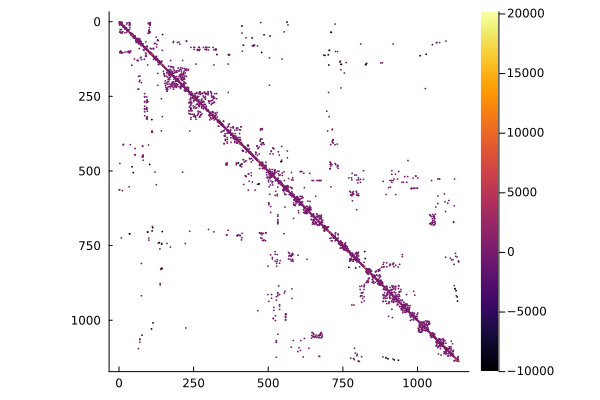

In [131]:
# estrutura de esparsidade de A
using Plots
spy(A)

In [132]:
# Testando gradientes conjugados
b = A*ones(n)
x0 = rand(n)
x, r, iter = cg(A,b,x0, maxiters=5*n, saidas=false);

# resíduo final, iterações
r, iter

(7.789662782950453e-9, 2930)

In [133]:
# contabilizando tempo de resolução
@time cg(A,b,x0, maxiters=5*n, saidas=false);

  0.084305 seconds (70.34 k allocations: 206.077 MiB, 43.82% gc time)


## Exercícios

**Exercício 13:** Repita os testes com os códigos fornecidos. Invente problemas e aplique os métodos para visualizar o comportamento e possíveis erros.

**Exercício 14:** Implemente o método de Newton que faça o seguinte:
1. Tente calcular a fatoração de Cholesky de $\nabla^2 f(x^k)$ para decidir qual direção tomar (Newtoniana ou gradiente)
2. Independentemente da direção escolhida, realize busca linear com Armijo e *backtracking*
3. Pare a execução declarando "função possivelmente ilimitada inferiormente" se $f(x^k)\leq M$ para algum parâmetro $M<0$ dado pelo usuário. Use como padrão $M=-10^{20}$

Teste sua implementação nos problemas irrestritos dos Exemplos 1, 2, 3 e 4. Também, invente problemas e inicie o método de diferentes pontos.

**Exercício 15:** Faça uma versão do método do exercício anterior usando gradientes conjugados para resolver o sistema Newtoniano ao invés do operador `\`. Caso gradientes conjugados não convirja ou dê erro, adote a direção de gradiente.

Se inicializarmos um vetor "vazio" no Julia, digamos do tipo numérico para números reais de precisão dupla (`Float64`),

In [134]:
gs = Float64[]

Float64[]

podemos agregar valores `gs` com o comando `push!`. Por exemplo,

In [135]:
push!(gs, 10.3)

1-element Vector{Float64}:
 10.3

In [136]:
push!(gs, 1e-5)
push!(gs, 5.67)

3-element Vector{Float64}:
 10.3
  1.0e-5
  5.67

Isso é útil quando queremos guardar informações das iterações de um algoritmo para plotar gráficos, por exemplo.

**Exercício 16:** Implemente uma modificação no código do método do gradiente que incialize o vetor `gs` fora do `while` principal, agregue os valor de $\|\nabla f\|_\infty$ em cada iteração, e retorne `gs` no final.

Use o vetor `gs` para plotar um gráfico $\|\nabla f\|_\infty$ em função das iterações.

Para fazer o gráfico, você deve carregar o pacote `Plots` e executar simplesmene

`fig = plot(gs, label="norma grad f")`

Caso queira salvar a figura, execute `savefig(fig, "figura.png")` (extensão pdf também é aceita).

# Acesso a bancos de problemas-teste

Um ponto importante quando se faz pesquisa que demande testes computacionais é o uso de problemas-teste (instâncias) consolidados na literatura.

A comunidade de otimização e pesquisa operacional disponibiliza vários bancos de problemas. Vários deles têm interfaces para Julia que facilitam o uso.

## Alguns bancos de problemas

**Otimização contínua**

- CUTEst (*Constrained and Unconstrained Testing Environment with safe threads*): problemas quadráticos e não lineares gerais. Inclui problemas lineares da coletânea NETLIB.
   - Interface: pacote `CUTEst`
   - [Página do pacote](https://github.com/JuliaSmoothOptimizers/CUTEst.jl)
- Problemas de quadrados mínimos não lineares de [Moré, Garbow e
Hillstrom (1981)](https://doi.org/10.1145/355934.355936): pacote [`NLSModels`](https://github.com/JuliaSmoothOptimizers/NLSProblems.jl)
- Problemas irrestritos: pacote [`OptimizationProblems`](https://github.com/JuliaSmoothOptimizers/OptimizationProblems.jl)

**Programação linear inteira mista e otimização combinatória**

- Problema do caixeiro viajante (*Traveling Salesman Problem*): [`TSPLIB`](https://github.com/matago/TSPLIB.jl)
- Problemas de localização de facilidades (*Facility Location Problems*): [`FacilityLocationProblems`](https://github.com/rafaelmartinelli/FacilityLocationProblems.jl)
- Problema de alocação generalizado (GAP - *Generalized Assignmnent Problem*): [`AssignmentProblems`](https://github.com/rafaelmartinelli/AssignmentProblems.jl)
- Problema de empacotamento (*Bin Packing Problem*): [`BPPLib`](https://github.com/rafaelmartinelli/BPPLib)
- *Capacitated Lot Sizing Problem*: [`LotSizingProblems`](https://github.com/rafaelmartinelli/LotSizingProblems.jl)
- *Multi-Depot Vechile Scheduling Problem*: [`MDVSP`](https://github.com/rafaelmartinelli/MDVSP)
- Problema de roteamento de veículos capacitado (*Capacitated Vehicle Routing Problem*): [`CVRPLIB`](https://github.com/chkwon/CVRPLIB)
- *Inventory Routing Problem*: [`InventoryRoutingProblems`](https://github.com/rafaelmartinelli/InventoryRoutingProblems.jl)
- *Capacitated Arc Routing Problem*: [`CARPData`](https://github.com/rafaelmartinelli/CARPData.jl)

**Banco de matrizes**

- Matrizes esparsas da *[Suite Sparse Matrix Collection](https://sparse.tamu.edu/)*: inclui inúmeras matrizes de porte pequeno à grande, provenientes de aplicações
   - pacote `MatrixDepot` (usado no exemplo de gradientes conjugados)
   - [Página do pacote](https://github.com/JuliaMatrices/MatrixDepot.jl)

**Conjuntos de dados para aprendizado de máquina**

- Pacote [`MLDatasets`](https://github.com/JuliaML/MLDatasets.jl)

**Formatos específicos**

- Leitura de arquivos [AMPL](https://ampl.com/) (`.nl`): pacote [`AmplNLReader`](https://github.com/JuliaSmoothOptimizers/AmplNLReader.jl)
- Leitura de arquivos `MPS` e `QPS` (programação linear e quadrática): pacote [`QPSReader`](https://github.com/JuliaSmoothOptimizers/QPSReader.jl)

**Fontes sem interface para Julia, mas que podem ser lidas implementando funções adequadas**

- [Página com links para várias bibliotecas](http://people.brunel.ac.uk/~mastjjb/jeb/info.html)
- [Problemas com restrições de equilíbrio/complementaridade](https://wiki.mcs.anl.gov/leyffer/index.php/MacMPEC)

Vamos destacar dois bancos de testes:
- **[CUTEst](https://github.com/ralna/CUTEst/wiki) (*Constrained and Unconstrained Testing Environment with safe threads*)**  
  Este é um dos principais banco de problemas para testes de algoritmos para programação não linear geral. Contém problemas quadráticos, não lineares gerais e lineares. É amplamente aceita na comunidade como certificado do bom funcionamento de um algoritmo.

- **Matrizes esparsas da *[Suite Sparse Matrix Collection](https://sparse.tamu.edu/)***  
  É o principal banco de matrizes. É mantida pela Universidade da Flórida. Contém variadas matrizes de diferentes tamanhos, tipos (simétricas ou não, definidas positivas ou não etc). As matrizes provém de aplicações, assim são uma ótima base para testes "verdadeiros".

## CUTEst

`CUTEst` é o pacote que lê problemas do banco de problemas. Ao instalar este pacote, todos os problemas da CUTEst são automaticamente baixados, logo não é necessário baixá-los manualmente. Os problemas já vêm no formato `NLPModels`, cujas derivadas podem ser calculadas automaticamente.

In [137]:
using CUTEst

# carrega o problema BYRDSPHR
nlp = CUTEstModel("BYRDSPHR");

In [138]:
display(nlp)

  Problem name: BYRDSPHR
   All variables: ████████████████████ 3      All constraints: ████████████████████ 2     
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ████████████████████ 2     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: ( 50.00% sparsity)   3               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                    nonlinear: ████████████████████ 2     
                                                         nnzj: (  0.00% sparsity)   6     



Como sei quais problemas estão na CUTEst?

Executando `list_sif_problems()` você verá a lista completa dos problemas.

No momento da escrita desses slides, a coletânea possui 1539 problemas... Então, na prática, é comum escolhermos os problemas por categorias.

In [139]:
# Problemas irrestritos com mínimo de 10 variáveis, máximo de 20,
# somente variáveis livres (sem limitantes)
probs = select_sif_problems(min_var=10, max_var=20, contype="unc", only_free_var=true)

9-element Vector{String}:
 "TRIGON1"
 "STRATEC"
 "PARKCH"
 "HILBERTB"
 "WATSON"
 "TESTQUAD"
 "OSBORNEB"
 "STRTCHDV"
 "TRIGON2"

In [140]:
# descarregando problema previamente carregado
finalize(nlp)
# carregando o 9o problema da lista "probs"
nlp = CUTEstModel(probs[9]);

Neste ponto, `nlp` já está pronto para ser usado. Por exemplo, podemos aplicar nosso método de gradiente:

In [141]:
include("gradiente.jl")
gradiente(nlp, maxiters=1000);

Iter  |     norma ∇f |            t
    0 | 3.914385e+02 | 1.000000e+00
    1 | 7.418185e+01 | 7.812500e-03
    2 | 8.605208e+01 | 1.220703e-04
    3 | 5.790627e+02 | 6.250000e-02
    4 | 1.100824e+03 | 3.906250e-03
    5 | 8.634119e+00 | 3.906250e-03
    6 | 5.177649e+00 | 1.000000e+00
    7 | 2.067650e+00 | 1.953125e-03
    8 | 9.612982e-01 | 1.000000e+00
    9 | 4.353371e-01 | 1.953125e-03
   10 | 2.005628e-01 | 1.000000e+00
   11 | 9.178642e-02 | 1.953125e-03
   12 | 4.214421e-02 | 1.000000e+00
   13 | 1.932249e-02 | 1.953125e-03
   14 | 8.865104e-03 | 1.000000e+00
   15 | 4.066024e-03 | 1.953125e-03
   16 | 1.865168e-03 | 1.000000e+00
   17 | 8.555350e-04 | 1.953125e-03
   18 | 3.924375e-04 | 1.000000e+00
   19 | 1.800103e-04 | 1.953125e-03
   20 | 8.257085e-05 | 1.000000e+00
   21 | 3.787521e-05 | 1.953125e-03
   22 | 1.737336e-05 | 1.000000e+00
   23 | 7.969157e-06 | 1.953125e-03
   24 | 3.655452e-06 | 1.000000e+00
   25 | 1.676755e-06 | 1.953125e-03
   26 | 7.691275e-07 | 1.000

**Observação:** ao carregar um problema da CUTEst, o pacote pode ficar "ocupado" com aquele problema gerando erro ao tentar ler outro problema. Então, para carregar outro modelo, primeiro descarregue o anterior:

In [142]:
finalize(nlp)    # garantindo que nlp estará liberado
nlp = CUTEstModel("3PK")

  Problem name: 3PK
   All variables: ████████████████████ 30     All constraints: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ████████████████████ 30               lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: ( 50.54% sparsity)   230             linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                    nonlinear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                         nnzj: (------% sparsity)         



**Lista de atributos para filtragem de problemas da CUTEst**

- **max_var=[número]**: número máximo de variáveis
- **min_var=[número]**: número mínimo de variáveis
- **max_con=[número]**: número máximo de restrições ordinárias ($h(x)=0$ e $g(x)\leq 0$)
- **min_con=[número]**: número mínimo de restrições ordinárias ($h(x)=0$ e $g(x)\leq 0$)
- **only_free_var=true**: somente problemas com todas as variáveis livres
- **only_bnd_var=true**: somente problemas com variáveis limitadas
- **only_equ_con=true**: somente problemas com restrições ordinárias de igualdade
- **only_ineq_con=true**: somente problemas com restrições ordinárias de desigualdade
- **only_linear_con=true**: somente problemas com restrições ordinárias lineares
- **only_nonlinear_con=true**: somente problemas com restrições ordinárias não lineares

- **objtype=T**: tipo da função objetivo, onde **T** pode assumir
  - **"none"**: sem função objetivo (problema de viabilidade)
  - **"constant"**: função objetivo constante
  - **"linear"**: função objetivo linear
  - **"quadratic"**: função objetivo quadrática
  - **"sum_of_squares"**: função objetivo igual à uma soma de quadrados
  - **"other"**: outro tipo não especificado acima
  - Obs: `CUTEst.objtypes` lista os tipos de função objetivo acima.
- **contype=C**: categoria das restrições, onde **C** pode assumir
  - **"unc"**: sem restrições (problema irrestrito)
  - **"fixed_vars"**: restrições somente fixando variáveis
  - **"bounds"**: somente limitantes em variáveis
  - **"network"**: restrições representam a matriz de adjacência de uma rede
  - **"linear"**: apenas restrições lineares
  - **"quadratic"**: apenas restrições quadráticas (inclue as lineares)
  - **"general"**: restrições mais gerais que as categorias acima
  - Obs: `CUTEst.contypes` lista os tipos de restrições acima.

## Suite Sparse Matrix Collection

No site https://sparse.tamu.edu/ você pode consultar as matrizes categorizadas.

<center><img src="imagens/suite_sparse_matrix.png" width=500></img></center>

Um pacote que lê o banco de matrizes é o `MatrixDepot`

In [143]:
using MatrixDepot

In [144]:
# Carregando a matriz 1138_bus do grupo HB
A = matrixdepot("HB/1138_bus");

**Observação:** no primeiro carregamento, a matriz é baixada da internet.

In [145]:
# tamanho de A
size(A)

(1138, 1138)

In [146]:
# A é simétrica?
issymmetric(A)

true

In [147]:
# A é deifnida positiva?
try
F = cholesky(A)
println("SIM, pois Cholesky deu certo! :)")
catch
println("Não :(")
end

SIM, pois Cholesky deu certo! :)


Algumas entradas da coletânea contêm mais do que uma matriz.

Por exemplo, `LPnetlib/lp_25fv47` (https://sparse.tamu.edu/LPnetlib/lp_25fv47) são dados de um problema de programação linear

$$
\min_x \ c^tx \quad \text{s.a} \quad Ax=b, \quad l\leq x\leq u
$$

In [148]:
# Carregando TODOS os dados disponíveis em LPnetlib/lp_25fv47
P = mdopen("LPnetlib/lp_25fv47");

In [149]:
P.A

821×1876 SparseMatrixCSC{Float64, Int64} with 10705 stored entries:
⎡⡂⠀⠀⠀⠀⠀⠐⢲⣦⣤⣤⣤⠀⠀⠀⠀⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠂⠀⠐⠚⡶⣛⣓⡒⣟⡷⡖⠛⎤
⎢⠙⠆⠀⠀⠀⠀⠀⠤⠛⠿⠿⢿⣤⣄⣤⣤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠤⠴⠖⠆⠑⢧⢤⣤⎥
⎢⠀⢦⡀⠀⠀⠀⠀⠃⠂⠀⠀⢸⡭⣿⣿⣿⣟⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠩⠉⣳⡖⠒⡒⠈⣾⣿⎥
⎢⠀⠀⢥⡀⠀⠀⠀⣁⠀⠀⠀⠈⠀⠉⠉⠁⠹⢷⣆⢀⡀⣀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠑⣞⠐⠙⡏⣟⣗⠊⢁⎥
⎢⠀⠀⠀⡀⠀⠀⠀⡬⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⣯⣿⣿⣟⣿⠀⠀⠀⠀⠀⠀⠀⢬⠤⢤⠴⣀⣀⣭⣤⣞⎥
⎢⠀⠀⠀⠙⠆⠀⠀⠤⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠾⠻⠿⠿⠷⠶⣤⣀⣤⣀⠀⠀⠀⠚⠂⠚⠓⡒⠲⠞⠓⣲⎥
⎢⠀⠀⠀⠀⠳⡄⠀⣂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⣿⣛⣿⡀⠀⠀⠩⠒⠲⠖⡓⣒⠊⠀⠎⎥
⎢⠀⠀⠀⠀⠀⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⣿⣿⣰⠚⣲⡗⣶⣖⣿⢶⡇⎥
⎣⠀⠀⠀⠀⠀⠀⠧⠴⠁⠀⠀⠈⠁⠀⠀⠈⠀⠀⠈⠉⠀⠈⠀⠀⠈⠀⠀⠀⠈⠉⠩⠗⠛⠚⠻⠿⠾⠓⠻⠩⎦

In [150]:
P.b'

1×821 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  29.0  60.0  73.0  77.0  27.0  44.0  …  200.0  79.0  148.0  146.0  247.0

In [151]:
P.c'

1×1876 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.5313

Tecle `P.` TAB -> TAB para visualizar todos os elementos carregados em P

## Exercícios

**Exercício 17:** Crie a lista dos problemas da CUTEst que possuem no máximo 1000 variáveis, mínimo de 10 restrições, somente restrições de igualdade com pelo menos uma não linear e função objetivo do tipo "quadrática" ou "soma de quadrados".

*Dica: para capturar problemas com função objetivo quadrática OU soma de quadrados, passe o parâmetro*

`objtype=["quadratic";"sum_of_squares"]`

**Exercício 18:** Crie a lista dos problemas irrestritos da CUTEst.

# Acesso a solvers de terceiros

A comunidade de otimização / pesquisa operacional implementou e disponibiliza uma quantidade grande de métodos. São códigos feitos puramente em Julia ou interfaces em Julia para pacotes em outras linguagens.

Vamos exemplificar com o uso de alguns pacotes livres.

## Ipopt - Interior Point Optimizer

Implementação de um método de pontos interiores para problemas gerais com restrições, descrito em

[A. Wächter and L. T. Biegler, On the Implementation of a Primal-Dual Interior Point Filter Line Search Algorithm for Large-Scale Nonlinear Programming, Mathematical Programming 106(1), pp. 25-57, 2006](https://doi.org/10.1007/s10107-004-0559-y)

Este pacote é mantido pelo consórcio COIN-OR e é amplamente utilizado pela comunidade acadêmica e industrial. É considerado um dos melhores *solvers* para problemas de programação não linear com restrições.

1. Página do desenvolvedor: https://github.com/coin-or/Ipopt
2. Interface para Julia para modelos na estrutura `NLPModels`: pacote `NLPModelsIpopt`

**Exemplo de uso do Ipopt**

In [152]:
using NLPModelsIpopt

In [153]:
using CUTEst

# descarrega nlp caso algum problema foi carregado anteriormente
if @isdefined(nlp) finalize(nlp) end

# carrega o problema BYRDSPHR da CUTEst
nlp = CUTEstModel("BYRDSPHR")

  Problem name: BYRDSPHR
   All variables: ████████████████████ 3      All constraints: ████████████████████ 2     
            free: ████████████████████ 3                 free: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                lower: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                upper: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
         low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0              low/upp: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
           fixed: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0                fixed: ████████████████████ 2     
          infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0               infeas: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
            nnzh: ( 50.00% sparsity)   3               linear: ⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅⋅ 0     
                                                    nonlinear: ████████████████████ 2     
                                                         nnzj: (  0.00% sparsity)   6     



In [154]:
# Resolve problema com Ipopt
saida = ipopt(nlp)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality c

"Execution stats: first-order stationary"

In [155]:
saida.solution   # Solução obtida

3-element Vector{Float64}:
 0.5000000000000001
 2.0916500663387194
 2.0916500663337803

In [156]:
saida.iter   # Número de iterações

12

In [157]:
saida.multipliers   # Multiplicadores de Lagrange

2-element Vector{Float64}:
  0.6195228609333598
 -0.3804771390666402

In [158]:
saida.objective   # Valor FO final

-4.6833001326725

In [159]:
saida.primal_feas   # Violação das restrições

8.876455126483052e-12

Lista dos atributos:
```
julia> saida.
bounds_multipliers_reliable  dual_feas                    dual_residual_reliable
elapsed_time                 iter                         iter_reliable
multipliers                  multipliers_L                multipliers_U
multipliers_reliable         objective                    objective_reliable
primal_feas                  primal_residual_reliable     solution
solution_reliable            solver_specific              solver_specific_reliable
status                       status_reliable              time_reliable
```

## Algencan - Lagrangeano aumentado

Implementação do método de lagrangeano aumentado com salvaguardas descrito em

[R. Andreani, E. G. Birgin, J. M. Martínez, M. L. Schuverdt. On Augmented Lagrangian Methods with General Lower-Level Constraints. SIAM Journal on OptimizationVol. 18(4):1286-1309, 2008](https://doi.org/10.1137/060654797)

É um pacote desenvolvido por pesquisadores do Brasil. É bem consolidado e muito estudado na literatura. Também resolve problemas de programação não linear com restrições.

1. Página do desenvolvedor: https://www.ime.usp.br/~egbirgin/tango/codes.php
2. Interface Julia para modelos na estrutura `NLPModels`: pacote `NLPModelsAlgencan` (escrito por Paulo J. S. Silva)

A execução de Algencan segue a mesma lógica de Ipopt.

In [160]:
using NLPModelsAlgencan
using CUTEst

if @isdefined(nlp) finalize(nlp) end
nlp = CUTEstModel("BYRDSPHR");

**Observação:** para instalar Algencan, é necessário alguma implementação da biblioteca de álgebra linear BLAS instalada no sistema. Em sistemas GNU/Linux, será necessário o pacote de sistema `libopenblas-dev` ou similar.

In [161]:
saida = algencan(nlp)


 This is ALGENCAN 3.1.1.
 ALGENCAN, an Augmented Lagrangian method for nonlinear programming, is part of
 the TANGO Project: Trustable Algorithms for Nonlinear General Optimization.
 See http://www.ime.usp.br/~egbirgin/tango/ for details.

 There are no strings to be processed in the array of parameters.

 The specification file is not being used.

 Available HSL subroutines = NONE           

 ALGENCAN PARAMETERS:

 firstde                =                    T
 seconde                =                    T
 truehpr                =                    T
 hptype in TN           =               TRUEHP
 lsslvr in TR           =            NONE/NONE
 lsslvr in NW           =            NONE/NONE
 lsslvr in ACCPROC      =            NONE/NONE
 innslvr                =                   TN
 accproc                =                    F
 rmfixv                 =                    T
 slacks                 =                    F
 scale                  =                    T
 epsfeas       

"Execution stats: first-order stationary"

In [162]:
saida.solution

3-element Vector{Float64}:
 0.5000000067183041
 2.091650072235853
 2.0916500607874013

In [163]:
saida.multipliers

2-element Vector{Float64}:
  0.6195228592651569
 -0.3804771374970072

In [164]:
saida.objective

-4.683300139741558

## Alterando parâmetros em Ipopt e Algencan

E possível executar Ipopt, Algencan ou qualquer outro método alterando os parâmetros.

Os parâmetros dependem de cada método.

Por exemplo, para executar Ipopt com no máximo 5 iterações, fazemos:

In [165]:
saida = ipopt(nlp, max_iter=5)

This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        3

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -5.0000000e+00 1.60e+01 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

"Execution stats: maximum iteration"

A lista de parâmetros deverá ser obtida na página de cada pacote.

**Lista completa de parâmetros do Ipopt:**

- https://coin-or.github.io/Ipopt/OPTIONS.html

**Alguns parâmetros de Algencan:**
- epsfeas: tolerância para viabilidade
- epsopt: tolerância para norma do infinito do gradiente da função lagrangiano

Consulte https://www.ime.usp.br/~egbirgin/tango/codes.php ou https://doi.org/10.1137/1.9781611973365 para maiores detalhes.

## GLPK - GNU Linear Programming Kit

Pacote mantido pela comunidade de software livre. É uma implementação em C dos métodos simplex e variantes, pontos interiores para PL e métodos enumerativos para programação linear inteira mista.

1. Página do desenvolvedor: https://www.gnu.org/software/glpk/
2. Interface Julia: pacote `GLPK`

Ao contrário dos anteriores, GLPK não trabalha com a estrutura `NLPModels`, e sim com no modelo `JuMP` diretamente. De fato, em problemas lineares não faz sentido o cálculo de derivadas automaticamente, já que os dados são todos lineares.

Ao inicializar um modelo `JuMP` em branco, fazíamos `P = Model()`.

Aqui, vamos inciar o modelo já dizendo que o GLPK será utilizado.

In [166]:
using JuMP
using GLPK

In [167]:
P = Model(GLPK.Optimizer)

A JuMP Model
├ solver: GLPK
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 0
├ num_constraints: 0
└ Names registered in the model: none

Observe que GLPK foi atribuído à `P`, como indica a linha `solver: GLPK`

Escrevemos o modelo como anteriormente...

In [168]:
# dados para um PL qualquer...
n = 5   # número de variáveis
m = 2   # número de restrições
A = rand(m,n)
b = A*ones(n)
c = rand(n);   # vetor de custos (FO)

In [169]:
@variable(P, x[1:n]);

In [170]:
# altera limitantes inferiores e superiores de x
for i in 1:n
    set_lower_bound(x[i], -10.0)
    set_upper_bound(x[i], 10.0)
end;

In [171]:
@objective(P, Min, c'*x);

In [172]:
@constraint(P, A*x == b);

A novidade aqui é a forma de executar o *solver*:

In [173]:
optimize!(P)

Neste ponto, GLPK foi aplicado e toda saida foi gravada no próprio `P`.

In [174]:
if termination_status(P) == OPTIMAL   # testando se o problema foi resolvido
    println("O problema foi resolvido com sucesso!")
else
    println("O problema não foi resolvido.")
end

O problema foi resolvido com sucesso!


In [175]:
value.(x)    # valor de cada variável no fim (solução)

5-element Vector{Float64}:
  -1.3258370437602132
  -7.182467040986463
  10.0
 -10.0
  10.0

In [176]:
objective_value(P)   # objetivo na solução

-4.902643046303044

## Softwares proprietários

Pacotes **proprietários** para programação linear, inteira mista, quadrática e outros:
1. **Gurobi**  
   Página do desenvolvedor: https://www.gurobi.com/  
   Interface Julia: https://github.com/jump-dev/Gurobi.jl
2. **IBM CPLEX**  
   Página do desenvolvedor: https://www.ibm.com/products/ilog-cplex-optimization-studio  
   Interface Julia: https://github.com/jump-dev/CPLEX.jl
3. **Xpress**  
   Página do desenvolvedor: https://www.fico.com/en/products/fico-xpress-optimization  
   Interface Julia: https://github.com/jump-dev/Xpress.jl
5. **Mosek**  
   Página do desenvolvedor: https://www.mosek.com/  
   Interface Julia: https://github.com/jump-dev/MosekTools.jl
7. **Knitro**  
   Página do desenvolvedor: https://www.artelys.com/knitro  
   Interface Julia: https://github.com/jump-dev/KNITRO.jl ou https://github.com/JuliaSmoothOptimizers/NLPModelsKnitro.jl

**ATENÇÃO:** *softwares* proprietários requerem prévia obtenção de licença de uso e instalação manual. A instalação da interface Julia **não** baixa os *solvers* automaticamente.

## Outros pacotes selecionados

1. O pacote Julia `Krylov` possui implementações eficientes de métodos "tipo Krylov" para resolução de sistemas lineares, tais como o gradientes conjugados. Veja https://jso.dev/Krylov.jl/stable
2. O projeto `JuliaSmoothOptimizers` possui vários pacotes interessantes para otimização. Veja https://github.com/JuliaSmoothOptimizers
3. O pacote `Optim` possui implementações de vários métodos, como L-BFGS e Newton com regiões de confiança. Veja https://julianlsolvers.github.io/Optim.jl/stable/
4. O projeto JuliaNLSolvers reúne diferentes pacotes, como o `Optim`. Veja https://github.com/JuliaNLSolvers
5. `Tulip` é um método de pontos interiores para PL que implementa técnicas modernas, feito em Julia. Veja https://github.com/ds4dm/Tulip.jl
6. Pacotes para programação cônica (semidefinida e outros): [SCS](https://github.com/jump-dev/SCS.jl), [ProxSDP](https://github.com/mariohsouto/ProxSDP.jl), [DSDP](https://github.com/jump-dev/DSDP.jl?tab=readme-ov-file), [SDPJSolver](https://github.com/FishboneChiang/SDPJSolver.jl)
7. `Flux`: pacote para aprendizado de máquina. Veja https://fluxml.ai/ e https://github.com/FluxML/Flux.jl

## Exercícios

**Exercício 17:** Resolva todos os modelos com restrições apresentados usando Ipopt e Algencan. Para cada problema / método, leia a solução obtida. Se possível confira se o ponto calculado é solução ótima, pelo menos aproximadamente.

**Exercício 18:** Invente instâncias do GAP (Exercício 11) e resolva-as usando o GLPK. Adapte seu código feito no Exercício 11 se necessário.

# Lendo arquivos texto estruturados - pacote `DelimitedFiles`

Eventualmente, queremos ler arquivos de texto estruturados de forma organizada. Uma típica situação é quando instâncias para um determinado problema são fornecidas em formato TXT.

Vamos considerar o GAP (generalized assignment problem - Exercício 6) como exemplo.

$$
\begin{align*}
\max_x & \sum_{i=1}^m \sum_{j=1}^n p_{ij}x_{ij}\\
\text{s.a } & \sum_{j=1}^n w_{ij}x_{ij}\leq t_i \qquad i=1,\ldots,m\\
& \sum_{i=1}^m x_{ij} \leq 1 \qquad j=1,\ldots,n\\
& x_{ij}\in \{0,1\} \qquad i=1,\ldots,m, \quad j=1,\ldots,n
\end{align*}
$$

Instâncias usadas na literatura para este problema estão discponíveis em

https://people.brunel.ac.uk/~mastjjb/jeb/orlib/files/

O arquivo `gap1.txt` começa assim:

```
 5
 5 15
 17 21 22 18 24 15 20 18 19 18 16 22 24 24 16
 23 16 21 16 17 16 19 25 18 21 17 15 25 17 24
 16 20 16 25 24 16 17 19 19 18 20 16 17 21 24
 19 19 22 22 20 16 19 17 21 19 25 23 25 25 25
 18 19 15 15 21 25 16 16 23 15 22 17 19 22 24
 8 15 14 23 8 16 8 25 9 17 25 15 10 8 24
 15 7 23 22 11 11 12 10 17 16 7 16 10 18 22
 21 20 6 22 24 10 24 9 21 14 11 14 11 19 16
 20 11 8 14 9 5 6 19 19 7 6 6 13 9 18
 8 13 13 13 10 20 25 16 16 17 10 10 5 12 23
 36 34 38 27 33
```

A primeira linha contém o número de instâncias.
Os blocos seguintes seguem o seguinte formato, descrevendo cada instância:

```
m n               (linha 2)
[matrix p]
[matrix w]
[vetor t]
```

O pacote `DelimitedFiles` lê textos estruturados como este e organiza tudo numa tabela (como se fosse uma planilha do Excel)

A partir daí podemos extrair dados de forma simples.

In [177]:
using DelimitedFiles
dados = readdlm("GAP/gap1.txt")

61×15 Matrix{Any}:
  5    ""    ""    ""    ""    ""  …    ""    ""    ""    ""    ""    ""
  5  15      ""    ""    ""    ""       ""    ""    ""    ""    ""    ""
 17  21    22    18    24    15       18    16    22    24    24    16
 23  16    21    16    17    16       21    17    15    25    17    24
 16  20    16    25    24    16       18    20    16    17    21    24
 19  19    22    22    20    16    …  19    25    23    25    25    25
 18  19    15    15    21    25       15    22    17    19    22    24
  8  15    14    23     8    16       17    25    15    10     8    24
 15   7    23    22    11    11       16     7    16    10    18    22
 21  20     6    22    24    10       14    11    14    11    19    16
 20  11     8    14     9     5    …   7     6     6    13     9    18
  8  13    13    13    10    20       17    10    10     5    12    23
 36  34    38    27    33      ""       ""    ""    ""    ""    ""    ""
  ⋮                           ⋮    ⋱         ⋮      

In [178]:
# quantidade de instâncias no arquivo
dados[1,1]

5

In [179]:
# m, n estão na linha 2, colunas 1, 2
# para garantir que o tipo numérico é inteiro, convertemos as entradas (Int.)
m, n = Int.(dados[2,1:2])

2-element Vector{Int64}:
  5
 15

In [180]:
# p é o próximo bloco m x n
p = Int.(dados[ 3:(3+m-1) , 1:n])

5×15 Matrix{Int64}:
 17  21  22  18  24  15  20  18  19  18  16  22  24  24  16
 23  16  21  16  17  16  19  25  18  21  17  15  25  17  24
 16  20  16  25  24  16  17  19  19  18  20  16  17  21  24
 19  19  22  22  20  16  19  17  21  19  25  23  25  25  25
 18  19  15  15  21  25  16  16  23  15  22  17  19  22  24

In [181]:
# w é o próximo bloco m x n
w = Int.(dados[ (3+m):(3+2*m-1) , 1:n])

5×15 Matrix{Int64}:
  8  15  14  23   8  16   8  25   9  17  25  15  10   8  24
 15   7  23  22  11  11  12  10  17  16   7  16  10  18  22
 21  20   6  22  24  10  24   9  21  14  11  14  11  19  16
 20  11   8  14   9   5   6  19  19   7   6   6  13   9  18
  8  13  13  13  10  20  25  16  16  17  10  10   5  12  23

In [182]:
# t é a próxima linha 1 x m
t = Int.(dados[ 3+2*m , 1:m ])

5-element Vector{Int64}:
 36
 34
 38
 27
 33

Com isso podemos fazer uma função que lê a primeira instância de um arquivo TXT passado como parâmetro:

In [183]:
function readGAP(arquivo)
    dados = readdlm(arquivo)

    m, n = Int.(dados[2,1:2])

    p = Int.(dados[ 3:(3+m-1) , 1:n])
    w = Int.(dados[ (3+m):(3+2*m-1) , 1:n])
    t = Int.(dados[ 3+2*m , 1:m ])

    return m, n, p, w, t
end

readGAP (generic function with 1 method)

## Exercícios

**Exercício 19:** Baixe as instâncias do GAP na página do minicurso e resolva-as com sua implementação do Exercício 17. Leia os dados das instâncias utilizando a função `readGAP`.